# Свёрточная сеть для классификации изображений:

In [10]:
%pip install keras

Note: you may need to restart the kernel to use updated packages.


# Импорт библиотек:

In [1]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras import layers
from keras.utils import np_utils

# для повторяемости результатов
np.random.seed(42)

# Загрузка данных для обучения и тестов:


In [25]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
#подготовка данных
x_test = x_test.astype('float32')
x_train = x_train.astype('float32')
x_test /= 255.
x_train /= 255.

# преобразуем метки классов в категирии
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)


In [5]:
x_train.shape, y_train.shape


((50000, 32, 32, 3), (50000, 10))

# Создание слоёв сети:

In [10]:
# Создание модели
model = Sequential()

# input
model.add(layers.Input(shape=(32, 32, 3)))

# первый слой свёртки
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", padding="same"))

# второй слой свёртки
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))

# слой подвыборки
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# слой регуляризайии
model.add(layers.Dropout(0.25))


# первый слой свёртки
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="same"))

# второй слой свёртки
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))

# слой подвыборки
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# слой регуляризайии
model.add(layers.Dropout(0.25))



# преобразование из 2Д в 1Д вид
model.add(layers.Flatten())

# полносвязный слой
model.add(layers.Dense(512, activation='relu'))

# слой регуляции
model.add(layers.Dropout(0.5))

# выходной слой
model.add(layers.Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [11]:
# help(model.fit)
print(model.summary())
print(x_train.shape)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)         

# Обучение сети:

In [13]:
model.fit(x_train, y_train, batch_size=32, epochs=25, validation_split=0.1, shuffle=True, verbose=1)

Epoch 1/25
1407/1407 [==============================] - 68s 49ms/step - loss: 2.0506 - accuracy: 0.2445 - val_loss: 1.9176 - val_accuracy: 0.2980
Epoch 2/25
1407/1407 [==============================] - 69s 49ms/step - loss: 1.7323 - accuracy: 0.3647 - val_loss: 1.7222 - val_accuracy: 0.3720
Epoch 3/25
1407/1407 [==============================] - 70s 50ms/step - loss: 1.5913 - accuracy: 0.4163 - val_loss: 1.4803 - val_accuracy: 0.4508
Epoch 4/25
1407/1407 [==============================] - 68s 48ms/step - loss: 1.4846 - accuracy: 0.4613 - val_loss: 1.4653 - val_accuracy: 0.4740
Epoch 5/25
1407/1407 [==============================] - 67s 48ms/step - loss: 1.4034 - accuracy: 0.4938 - val_loss: 1.3917 - val_accuracy: 0.4886
Epoch 6/25
1407/1407 [==============================] - 69s 49ms/step - loss: 1.3410 - accuracy: 0.5178 - val_loss: 1.4365 - val_accuracy: 0.4740
Epoch 7/25
1407/1407 [==============================] - 66s 47ms/step - loss: 1.2850 - accuracy: 0.5408 - val_loss: 1.2275 -

# Сохраняем модель:

In [15]:
model.save('my_model.h5')

# Проверка качества обучения:

In [18]:
# проверка качества обучения на тестовых данных
scores = model.evaluate(x_test, y_test, verbose=0)

# печать точности
print("Точносто работы на тестовых данных:%2.2f%%" % (scores[1], ))

Точносто работы на тестовых данных:0.74%


# Тест работы:

class_num:7 name:horse


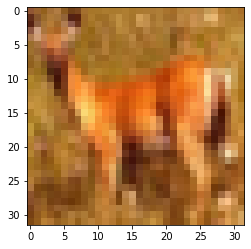

In [28]:
import matplotlib.pyplot as plt
test_img = x_test[110]
imgplot = plt.imshow(test_img)

# предсказание
prediction = model.predict(test_img.reshape((1, 32, 32, 3)))

#выводим номер класса
class_num = np.argmax(prediction[0])
class_name = classes[class_num]
#выводим правильный номер класса
print('class_num:%d name:%s' % (class_num, class_name))

# Opencv тест:

In [ ]:
from IPython.display import clear_output, Image, display, HTML
import numpy as np
import cv2
import base64

def arrayShow (imageArray):
    ret, png = cv2.imencode('.png', imageArray)
    encoded = base64.b64encode(png)
    return Image(data=encoded.decode('ascii'))
video = cv2.VideoCapture(0)
while(True):
    try:
        clear_output(wait=True)
        _, frame = video.read()
        lines, columns, _ =  frame.shape
        frame = cv2.resize(frame, (int(columns/4), int(lines/4))) 
        img = arrayShow(frame)
        display(img)
    except KeyboardInterrupt:
        video.release()

FileNotFoundError: No such file or directory: 'iVBORw0KGgoAAAANSUhEUgAAAKAAAAB4CAIAAAD6wG44AAAgAElEQVR4AbzB2bNlyXUf5t9aKzP33uece29NXd1ACyAoSpYd9pve/BfbfrAclkzJdkgRpkMKB2WJIgGSIIEG0WONdzjDHjJzDa6imgHAAkgABPl99D/8T/+cRUYpOeeSd7lwGfNUDmMqqeQkqexH7MbDNQ8Ewc+nQAUGQIAA7u7a7WbnvrZtOV+WZWvnHhJEbmpGicecRIRSIkkkkmXY73fXh8PVgT7eYQQIP4cCrx7i9uE8z+sXb0737WLtYstq623MR99WXdZl2TqamYcX1I3hsyklcXfd1l3iWhvYA4ArbRsBwRGetKpZY1IGNJIGCVYLk2QUa5gk31ngYmvJaavLMGQmcmNT6XbMeViWcymUsSdiDlAgqAubdiEaHepwAoVJOJCU4wKH8d5dE4mpdsK63gXWq+kpx57Zz5cXXHKebrZ6O+KqNpvGgSipmIdAlwJ2u25a8kjQJQn3aD0aUyBgQvQ//s//q0hKORcZkhzKkCi5p7yfbq7TNA7jcDVo4XFPI2MAGH8zAl7c28MyHy/zedmWunZzd2WmUHejlFIeKAiSC6U8penJ9U0aypMbfpIxAISf76Hh7qE/3N++vb+8OV7mtuhyaus9ttXqSr0e7y/NFlAnz6EMrbUvlFnDtekkss5L76tLpDyyg92FvdXVA24w9SwU1gRQeHckAtMFDujBQ53NwrvXEUycXEi1123JeZznt3kYcjmQDwyHd4oICgswCchhZiHMRDBVJwohAYuZZRjB79Zzi+16t8uWhNJmfavryJzSTUN4cNvqbjwPcliVSTKMhMKxRWSjwcI5kbkBLXlnCBz0z/7Z/5JyCR45F0oDy0icUkml5DGVw9XV4epAE6YRO6Dgl9UMx+P26ny6Py1bf0fNDKaFhIWJKQkloZTyNO3SOOyn6ep6GhIOhHcIP18HvnqI+7e35/m8nC/3d6eHy9zaZu3c10u083qZV90SiAPaqpv3Xktmi27ubeumnDhFmHln8ugm6IFqYbAIxztkAadm7kzMRLGyqiCBYFGNrKklJ5FkQerRWp2GfFqPxKmUMUVSrRo1SRYSIHE4qIWzQUiM1RJxDyKwmTkhU2rrsuq8uzpQOHMxbR7UFdGO0+66YxCPdb6TQVI+mDPBSRCBiC6orgOHOCgSh/VBsqbVXelf/PN/kZOkkqnsIw2cS/ChIw+H3ZRkNwyHXRmvMTAOAAOEv1kAClxqnC6ztha9uy4ePRERiJmIOUApZc6CNHZOJU3jIFcJCSD8Qg68PMXD/fF0f7pdTuu86Lpcjqe6zmZ1W+f5fDbdgpQCbIrQdbkIWvfNTFrFMO6tdnEGGlyD4Fqd1B1hFE7EFqYwDzPVADyyRVAKMEO7g8L6GQyWIoGu0XpPSU5rY+Yy5b7da+/73QcEIY53VKkkRxgigs1tRFBgy9LDxSFu5NYhEsHkQURAsPfeNGgu5aYpZ+bam1NI5gSCs4MgptYLCMJmwUjuweIANe1Ejf73f/WvUs5lGHqkPB5QppDEZU/DXlimIR8Kbq4xEQb8CgL4i4e2VG3z2ba5LmtrPeBEwQ6knFIah4HGzGmivJNSnl7nxwNGgADCL3S/4sXt+Z3j8bxtlzrPyzKvy6x1Xh7uau3aK4uByHp3c7MG6hGk9dzrimpDPpimCHNsFK7h5saw8ICHqbETQi1MzYWLm4LAjLCNwwxhvlbzMkyMDpN1madxf1qqEVtsJW0DD+ITSfEwZkYEARGuEUIMuHlQuHh3gQUxCQPdcqhnhnoYjBDWzKmVsgNAQculSlrGYe9eQKHeT/WyPwxeU0kkRBD0HgiAWMh6bfS7//L3cqE8IssouwOXIeW9SfaykzwkwfUezwsGgPArWHp8//V2WrduHe0itVpTdcscheEBSYlTHsYpTyMNYy77w1UaC26Agr/OqePl22Wez3dvHlrbtm05P5yWutQ219MRWvu2uVk4B1xVq22Ahrn1echpO128eRmu3CNME82mbhFGxiA1dUPyCG1OUHdgDA9mBwIxc/Tw3ExXm3O5oXCI13XTVtWVU9qNRQC4CUnXVMpkavAV3iOJe4gniCo8giQIwR2Vha1LGJeUw1qwLHXtVlP2Vpfr6RmFE6I7atcxC7MAAaD1Xi0ctqcyQsAtiDvEKTy8eNC//N3/Q4R3uz3llKYpDQPLbpwOUYY+DSS4TnicUYCMX1YAb2a9e7jMm67WWp2ja9+U4BQmjJI4OOU8BeUyTDSkNO7218M04IoxARm/0Br46vV2vpwup/O6rpfLUtfTfDydt9X6zFrbctGm4cXdt23r3izMtZstk5AAat63WnL21gMebgE0dQpnYrVtZG11Q8AMThMx3B1kbFsia566ebU5pTEzqXPvjYjm5RSsFH4Y95QOFJ5ArvCgiM7UmRyJwyI8t+iSPDzMssCSuFsgxEngHh5B7lHPl9csuJ6eW5jIsDRvatc5t+0UnN0tUIkzj4/ZALMxa28UkSg1DydR+uf/27867K9S3pXCUgqXoUy7Ie9yoVoShpEFTxIKMACMX8oD8LBEmy91Xnuv2rdtXd2YqDOBIhIPJOxCFgW5yDBKGqZpGod0PWIsyEAGMn6OAH78eptPD5dlPs9rW5Z1Xpb1eDlfau3M3dcHBkW3rfZlq95a9R4E1WPJDC+tkeqZ1UbAwyIQKh4NYISbqVpjdnFVUyYJzm4wM2Lv3pm41151GYYMY8JkvhLXbTn3oGl67n1T3fa7gYM9wAHmMHNiiwgiNt0H1LkRHBBEwCPgBASRhkQEEy/nN6pvRfLV/luZVOG16qo05RLWwkNSsnCDj+VgbgiKvoh0pkyULczI6f/6t7+fC5D2KU1JUimJmMuwSyl5YZRszKXgwNgBAjBA+OsY8HJD72j13JYZ1rxt7l1bdyMnYkbizCJBAiRJicfcFZR2iZMI74acMk0TdoIEJPz/XVp8/vnt8XR3XrfaW1vm5eF4qVttVU21baNpeFdt87Kp1q7VFK5NfZWcrJO1hyzirW+r7naZ/B2YcU5iqrW1TORWI9wcKUX3AME7uYUIte201Mt+d0BMCdG8hs+b9W6Yds9zwHzrtmQeCFQI7swAqIKgLVEqCgtSoVALIlCAPDzAzBHkHuE4n1/nIkCehj2HmW3OPG+1pJxsNUfe79f1DihmQrTJuEPwIEPoSpQqUaag//CH3yNOLBPnnHIqWYgoJGlgnIokUU4NyIIPMggwwAEBRoDxcyjwtqGtvra5tUraubfwBmvhThAiYkBEiEiIRTjnwiIejGBJOThRTkQlJRpGpAQCGCCA8bU3J/3BJ1+ezg/rvLTW23a6nJe1t5TJlkuYAgavy2XuXc17mMG8bjOhR1fmpKoUHgbhgNUA3ChCNNysE4W5hoKcidS9USI062ACkemlvcjjB+S78Go2i4S6bds2jaN7bOuaRKZh3yzKwHASCsC7EiCJyb2Zg0RCOYKIDayIoCB4hKP1dev3QzlsW9tdPSbzTS/u3bqN5TAmUrfN2tYuQ3pcSoQn8C7CU5jI3D27JJjTv//eJ6XkQDBomvacBIiUUmu9TONQkiS5r5pK2SeUBAIUICADCSj4Od6sunRE3ba6uXU2ZW9hPVGEBwAiKiJJIokUliyScxLhJInEURJkAidEAhEADWggAGEI3iPg85en4+u3W7188sXL47aGa3RFtMvxlBiu2lpdt3O49taI2LvpdiFECrZIqhsTuXcm1dokzCKTU2AFezMPJTcQMYVHdA9i1+6GAGDVZmGSGI1K041odU1rfUjSPDCkA9yLFE5Fg8OJEwMWrqAIzcJqQeQDhYMQCKUexIngXq1rW0/gUvJhvrwe9h+tvYPWknheToMAZll21dyiPdo/9+BwIanEiXsTQfWOVLwR/fH3f8yJkIt6t9qmw2EcRoC32qaSdrsdKJa+ld1eRAjgADEyIQMBCED4mgIMMN57tcY6L95Xb428sxuFw00Y72ShzEiMnChJyiIpAaWACYkhAjCQgAIkgAA4CAgCBX7i5evj/esvvnh999Xd0VSTeZuX82XlTNrrtq61LsSmbRFK4qb9Ure7nA6IffiqXcMj4NDGUFUQKKJ5qAe7koUhegSCOCJgar0Btm5roIlwSo/A0rT37RiuTg45uk5TuZ5KMQshEOeuClh4DlAEAUQw5u7OwQJzAhvB4IXQtFlTt3U3HNziXM/DePDu7rXZYlFL9pRyxNiMW6/7cp24ML1jYRtHBJM7MycPpz/95IsAOEnJOcKP5/PN9W6adud5LvuDmR1Gbq3mUiQNZRgLQEABCB5g/JUAHHBAAMJ7D12X80xae2umaqZCLrAkQgQOT8wpCxETLLwxM7GkPE67a0rFg7/86u1HHz2LIASbW+29du0yPX40jAABCnz3ky9f/+jFaZnXvpp2b3Z+eICgNXVd1/rAEeKGiG1be38gMnaBkodBYeYEV2thnQIezsTmMGtEMFUWeFh3c+folpg8PMK2bem+qhoL50TWlMCttVTSlKfMmSDdg0gRcDPh5E4BYsogcm+BCDhgZN1DkLOHwcnMtlbHgZIVJz4f72+u9xZjOFmcar+koWXaMQ3deo/eax7Gq8IrPEmi6Cf4tSEHVVCjP/2LL0uiQLwjKec0rpf7D549fXO+k5yeXD0ruVwud8M07ssOgOO9ggDMIQDhZwV+4vYyz5flnbpuy+m0H2QcChHUmrmaYb+/6b23trhvKfOjm0dluPrg2cdJEjEcP4cGnJAAwnsG/NGffPr5Z1+2Vruu1vV4f3LU3g1ul+PbsYhbbGswq+rtdpmHsnO1UAtlDwCdfHON7gxy904U4RoGtwAUbObmlh3g6KCw3h26bg+M0nX2aMHCmtlpPx2YGUHmGsIBt3AWDmOJEu6AMQIWEWqcQCHWIaEwBMTZIhmJI2CKoG097XeD+wBwBM7ra9ApCWlTEE+Hx25j7TpJZAE8OZJZdhLEmrnRH/zZJ4iesxDYbCP054+fTIen95f7x48+KKk4sGzHUWTMIyEF8Oq8FaLHh0IOYnJAgdUxLxXWgBiHw83IDATw4mF+eDidz2fx/jTJx9/6Zrned1tOl1cf3HwHSHivAreAA0+BCT8lgMDfQIE//PMvXn/x5bwu27oc784BI102rb2eJbRutm216+p6Gnmv3QkSZnB0V4pOPrs7UWpm7sxAqy2JUagZnMTcIjgc7Brh3VW9dn1IdBC21ubmkfN1W9d9GZKMDqfUPLpE1GqSB6IdWU8RROYC606QYApHmEG8R3h4IuJAR3E2mOZI59OyPwxOYWq9WUg1vSsla7XWeHd4lHlPRN2rxZlxGHjfnYLDvZVU6ZOvXotIFk4lZ0kR7eH+q6v9YRwP++kaIAfMNXMCAgiAIwAC4edzwIAAEkB477bHD3/wFyPaNwUf/fa3o4xbO5LUUR4DA95zYMN7E0D4WQEE/gYB/PDT1+fz6fjw9u2bl61ufW3btjycj1l4my9bf6e61n0ZrC1ujEA0VzeQmVU3pYhQDoapAwKo2cqp1NrYOgAm7mYBMlubtlq3FL672qlZ73WuFQSCJHjJWcpIkRDofS2SwzMCDAtqJA5PoaShKSULQSiRqWkQhoTeocG1zqOUti0pec7ZMIXzZqvQ2mqXbG1TkUf73SNY37w1e7srT8J2iEIMQg2q9NnLW0lccklJUhL3fr68HAbeT1dDegwQYISNsHMQfmkBOEAAAQr84OVbmR8+5HjyWx8rBmYJrAIGBnwtAMIv4PilPMz19v7+7asft225HHW5nF6/eSUil8u5tVV776pCHH0x1VCDhmo38wT36BYeQWbQ3ikCcABr85Q4bJFwqBilLdqy3u7KflvXnH1tl+aahQFu3YQKwsK6sFzt97VD0kAhFIh34MweqCCnEIcABA+O8IBZS5LMEbDW59YqQZhakmngEWnq6ls/u99ClFigH1TdhhxFpBpLatQJXtbO+4OIr0DQF6/vc2YpOUty2Pnu0924gxiJPtp/CyiBlUCMKYDAr8OBBdjevry2Nj7/Big73jFACQO+FgDhFwv8Ui7bdn/8vK9+PtXj/fHFi0/X5YEk1zV6r3XbtHt4Teu5mm2tWm0w864OEFE3DQq4m5qHuptZMMPd8I6TBZ/m41BoMLpfT8EbRQVKSXtza+Y5ldbXAFSViKfpOoGEkYIs2js5TQSnoIC5JwoiUUKYEYgQuCwzpBFprzOnq5xGV5uGQ1ciQPti3qvPMkwpUgKtvUoqWc4IcVfmbCCWzEbmQS/vz6mkzCJCt28+n4b89Ok3Tsvr/bhXzCM/CTjem/DrCsAACeftQtMOSAAcDjRgxG9YqN/e3c6t8/Hu9OL1X+TUL0dbFl7X2uqpbkvT1Zba1tq7qi7oHRStraBuyoiAWSC6hdWWE5l3NXa4e3Qn1ZYpLusF3oCLgw67m23eVBcRGsujS12Ye2sRcGLfTx8ypWW+EAcl2accYYgwsyyFnN9Rj6aQErqdpZQIX+YHSTwM+2Xp3dJuesSs1pd1eSDKnCejoNCgtbZtGp4IchIP35huQC2II8xsoNcPyzgmgC6XW4E/e/qNgLd2nMqjQCVsgADi2OFvQQEGBD8tAA1k/OZZj+1y3s7Ht7dvP+tq1ofzpS1zX5dzred126Dbetl67aa19aq1q23uPbSFOjkD1KObGXFSbdoaUYQV6xuHntdbDQuYU+zHKSHmTc1VyKb8dG5ryU08b1vtvnIepzLUbQGxJUkylnSjrbmepjIycfg7JSBBFmTucO5el5wGIuqqden7aYCTqi5+dOq7fGXmKQ0Wpv2eIqbxuRkBKYKEI8KbKjPT29NS8uSoXu+vbz5ygOGIi9A1AEdnXIBrQBy/cQ4w/k7Ew+mlW33z5kXtb9eFloVao7r2XpdtXVvvdVt1PemqrbZutm0zkfdWyZtrNS0RrbfmHOSoW2UmN2i3pm9rr5zGIMA0gXtvu105LmdzLQz3MYmIlTIm9XPtSzOMw7438ii7cQxrvbchS2ZODIWHwzE4xD04YgsVCg51IgKt8zyVITjDbatn51ryI2b27u490CAofO0WxAxXhoiQaQd1ul8WEZlPt8+ffSPwnkfN5MCE9wJYgRFgAI5fH8EJzVEAxt8HPy3z8fh5Xe97J9VxvmzLZdnWbVnX1i6tb205olpb29K8a63b0vscqowxwrVdrLNZB+J0mT10We7UdZiEHIEsKdV1Dr/sy555PF3uaz8G+pBvprwzjcN0ANx1vvQOlsw7RCKWiN69RrdSxmY15cQOYoSLGxNTg5ELMwMtPNbL6Xr3uJqm5Fs7tTofDs+YslZlwqb3xrmUpwxiVYIbJQkj6t2Ezk17r7vdTgDCexHKxATG1xxg/JXAr4nQCA3YByjw98GB13ef9u3tslzCd7XJMte2nud5bXVbl4tt1brN82lZLm/e3H755duH+cHhxf0f/dY3gynayjIsan/+gx/3OjtZt1CPwzQcpjwwBZZSSHDl6ltba19SEjNJiQX6aLiOdwCw1m4AEiekMVxMm5u12rmgeRfBPmVBMYNxEBGQEOa6EPG8rtO4QxDBu7ZN1/107R7LfElJuukwjVptGgePJAQPYk+Iagw6d2WRTHiH8Z77KjwChK8pkPC3xnEPcuAGSI6/DwGc6p3rcT7p/e1XHugtt632um3Ltq216blvdV0u3/vj7x8fjvfH1d+B3xwGMtOwJ/vh4Tg34S+/fAGQajeP7hAChd/sZD/Ix9/6nSnz7atXGm3dXgFGvAti123HU5Y9iVAwyGtvqUwEdwOD3b1ar1WJYhwlBwaS6p3T1B1myuQCd+93lzbtJqYkwaZztbtSPmxtFqbaV8CvxptwtmCWnMI8QDGCIqC0dichJrxDAEHd58zXDsLXAiD8bTn3O+QKPAZ2ABx/HxrqZX17vp/doFts29q29Z2t1rrNrS7at/Xh8vLViz/+/p89e/ZYmp/m9tXbWzPPqZc8HB/ONFjtdV2tNw90txYECjDpvgxPDje7wYmnCF/r3TjKtqgh5xT7NDAmonBidriD2cycRcyrRWhA0th7l4gMCZKAMzFR8oiuCwURx7zMWSaRSSjUHtb2Yhi+XbfqUZkqgGH/CDGQJ3JL4Q43cHABlGb1LASAAAI8aiYF9gAcvzEEpfYSZQSeAIy/FEDg704E4FgNen8+eUWdt63Wedm09XWeVde6rttW+7bcvvji33/3B97rfDpl5gg7dQ3qOY3L6dRCg5BF1vnSrJsu7oVIED3xVrgcdrv9eMjsvW37/X7bLiGu3a8OU4oxBVFkRyAMIEcKD0BAvdsmOXs4AhwCwMMD72kImM1VQPP8+nqYTDPR6Pxwnl+M07dRNxRJsESpaUmSHQFSgXOEBiCjutHSTQQIMDOA3h6msgMK/pIj8B7hb4dQaX2B6Qq4BjL+iuPviAJrIAXMYT3K+byu5/O2rPO61W2zVrftrMtS6+rWvvjxp7/3+/9xf3XQVrfTCklLW1qrBLK+tdZYeF03U5g3kIeliC3CgliYrkd+dnPt5su8XF/v3RcWYk4UtC8HiszBRBRwhTtG0gbyAAe5kIWrgSME4eQeBA1HZMhotonEfHm1G3baB8k78zYvL5PIkB8L2F2HnNURkYjM4cKwCDWLEEmFNg0WnOeHXfIyPLosr653e2ACGBBAAxxgwIEABL8W8pnqG0wJuAGu8FMcfxeccDS4AwTpGOrm8+VyPp902dZ5iWjret6W+eWLLz775Ef3t8dzt8u6wvHm7YOZda1ZRHuLPgezanjQbkhufdk21ebR4dwtOPWB6BtPno2jrHWRPJrZlISJzAyuh/0NxxAUQRbmwqQeTBRBFE4Uph7MbggJ076uq4iUYSQUMQfbaXnLlMpwFSBQr+dXKT1hPiTuThJOQoxgkMIbg6sGCYjCA7Sp8TuE16//9BvP/+F5eXPY7QkTMOI9BRhQoAMWGAMFvzpuJ/RX2B+AZ0DGzwog8Bunhle1zkjXxDfaTOt6Pi3L5bQtq7qv6+n4cApdv/v//v7t/fLV7Ss3Wee+1pVT9Kqmc2/maDBxY0hEdGFpHR4r7BLhEWaeWMqQpquJmLdh2B121yXtyJiwgapWHfIhggyRuTQ1pAGmcIVryhyu4QRAuQKsqsuyKajkcZcFwOVy514Pu2sEt95VZ1CX+EYamBL1ToR3PMHhCiIGIgg8qW+0aG+1Hnb7l6+//+R6B85T+QBI+FoFCtDw3oD3LICA4Fdh55eZL9h/BBzw8zh+41zj7VrflPK8+y4szNoyz/Pdcd22WtcIPd3fwfRf/+6/QJl+/PLNumy9r9p1GNJ8OpuZhmx1jnBVAUVihLtaWID4AeTbZcllz9gJYp/Lfq8ffPBhbS1aPLl+3HvP2aEdEWFhTt14RRqJEoPYOcydwRGkaogwAkDuTr31ubU88cCpb838lGSv1RJJUG5+TDJQCBCSR0EmIo9GECFx7w5CDIk6NTNnPNy/OUzY+sur3UdFPsTXDOjAgPcegBuA8ZcCCPwK/OGLJCuuvgWM+AUcv1nhsczrVyntVUezMI/W+nZZt2VZ69K2NcP+9A/+3Refff7pV2+OtbWqW6vrplKsbidXbK27RzirdrxHBAv3/eHRcjlqLF2dwilKZgEsc396c9W3/uzZR2MZEoG4uIYIR1hEd5fXd6+fPL7elst+mhI4iDySmpKg9y6SzTbzzsQMnnVOw0hV63YOiEiexqu1bbVv5PlmuHF2CrcwFgrybofMQdqIDQz3SkvTrbVua9hcyvpo/4zwGCAAhgdBCyjhAGzADjjgax7gwC/L3nyWpeLJc+AKYPwCAQR+MxxhsW7rV8L72pN2RcDVauva1ofj8fhw/ORPvvvm5Y/WZfny5XFZq1E/HTcFBXqgrUtrrbu5uQOIMIRr95KYYmBB90U9XCvBiZKbS/Sh2NXu6vHV0924H2UH4oCyK5yIeWv+6s2LJx9cm7qwlMwcIZSa+bJWiujWSMSih1emNaVwPCKj2lYZrzKjsDeNedtyEQSGdMNI8BZAMFPKqSrMFU4FYStdVJmFCYTYljfXu0dAwV+q9mKQBMzADaBABq4BBgzowAB4AAHB3yD89ScpVzz+GNgBBb+Y428jgBUoADlIvS7rZyXd1I1aa9b7up2DR1evy3x3+3q+3H/2o+//+Z9/cnd/WmufN2u9XV8lW7fj2k+nFbDaFHAid9cICw8CIQpBHItaJbCHA6Bwhgt8GPLHH3xwtb9mE5Fs0QVuyklYUv70izf7qzwW3izGPGZh9BUkHgRiDwIhTN1boHddvTlTUhByzjSWHL3p+Xy+utpFWK0meUzCQuyqIsJEqh5BlEjM6dI1CTNR67XOL588eg5M+EvN3hTZO24Zj4ARCOABeASsAAHXeM+A7siA4BcgRP3yT8brhKvfBgr+Jo5fW2ecAzcOClj3fr58keimNdW+vXM+v7h5/Ox82Y63b1+/evnysy/+4kef35/OD+d5WeatVab4r77zzRevj1++eKV9A1zdidmthlEAxGxusA7K5hoIIndzBIQ83EEuzB/srq7Hw35/Q+QAma9JoNrOC3Wnm6tJhLr1lFJJQ1YQcTcFweEsHD2EolqPQG1zwNV1P9wwswebbdu2sAiHgIRTdreSEpvFOyTuEeQQdwTd15pEkgghXr364bc+/E4g4y9t9c1uuOr4KuMjYAcswOfAM+ACPAGu8BM1IIGEn4fg9fP/NO5HPPkngOCX4Pj1VOAM3ATYYbVtdX0JTK1G7e10+bTWO6Gh5Kvl3D755LMf/vCTNy9v39zenufa6ua2fvPZo0z+Jz/4cUWEeXiYO3OYOcBmShTuFm5gIKJrZ2Z3BynhP2MCdlS+8cFH01iGMiSGu8/n+e7+KGXY7fdDkbDOyNM0EDmCzdk9CCBohLMIQrX2eblobJzJbSnlWclXEbT1+1bnUvYETqkIJTIwGSLCyZUhCWjKzTvX4esAACAASURBVIjpfp2TpJwTAa/e/ODjD/4RIHhPm74e06Men2X6h0AOfE5YgSfAGfgmMOJntAAHEv4LFL1++h/HqwOe/g5QAMbP6IADA35WAIFf1YWxOHaB8ur1y931oW9fwffm6fbuZbcvp/KB29BqffnF53/03R/c3j+cTqdXr28fzuff+vaz1199PqZ8e3u6LK17YxKP8HByAxiBgCPgYeYOmLuZw6NHBMKBLgQERxBTlCRD7kVGUxYRUxqniVO62pWEIKikktIVgxDdAwQwAkA3dwLA63Zye0VeEu9bu3OSlK6o7Lb5DuHjkEUmB08i7gEQgDA3IyYBc3cnAt1fTiWXlCQYt29+9M0P/qFDAFI7m12m8nztn075ucVMdM/4NrAAD8AO2AE7oOCnBBD4L/Tz9tl/2D3/YJZn+91TIOFnbAABA/4Ljl+SE2pgCJwJC7B/fXv//OkHD+dj62/Y9+vSzutXdTsLX2V5cnzz5nT/5tMXr/7oe58t6+XhdF7b3LdlN8rpeF+31lQjKIGJEebEgDuCIjwQYf5OUKjVQKi7WTc3kMFcPAmXSGG+MUVOPOScKKd8TUSHqeQg1e3Zo71xBnZM5NFYwrW7AZ6EXKlB9dxOcOzTFEjzerefDvPaQV6mXLcjE4/jc7BT35hGD0YoU7NgD6LIHBZk9PZ4yYnNeiqxLHdPH3+HQAGv2+shD0lujtufE5+EsUu/7QjGiTAAE7ADTsA1sMNPCSDwE1XXfvw0vf1qevyYnv8TYIefCMCAE7AHBqADCSD8FMcvI4ATIM2Xwu2y6H53rZaPpwftd33F1o7z+iKs9tpbyz/6089vrp78p+/+8cvbbWt2WZd127yv6+Wi3k2rmkVwEU5QNw1HSuLmTFSbkbB2Y6amW48aTmoe6A5HBCNzkJoRVJjAcEKWIafDzWEn0II8jpwEQx6B7EQMdQ43hlIiIneXtpw/U6Jh/03qbMHL9vYwHcLlcjlBKliZ0i59SOiEDiSEuGlKYaEGCIu5ExP94R/93zc3T26ef6ut95L4+vCNqjrkcnf7o6ePnwsf3p7/LOe7q/KPmTPw0LEVfAgo8BQw4EtgDzwDCH8lgMDXFMfjZ9+fTnfTh9/Q638wDE8BwtcUMOAWeAYUwAEGDBD8lAACf40AAjgZjrXnzCJ81S1ab+fTHeJCyMfzV+PI2vnu9Wef/OATpsMXP/zyi5ev3py1NbeITU23qrWZLbVtRFaQEMEUACicARCbNfd4R1sArNGbLoTePdyTRQt4V6TEoZ2JSDgiCAHJuVwVx+Or8VBKQHZXY2IQMRlA2cMtOnEyUxD3XpfL/Tj4mPbhqWms9TTu9+Rgjvlycps5T8DNbiTyCB/AU1cXceZFtTGRu4GY3p7evn7xQ7OtDPThh//1uHvKJAR8+fL73/7oO7fnL4HPduXjafjt4+WHN4drjUh0RXDgMd4L4A4YgAN+SgCB/6x99f3/52q7nz78B/HkO8PwFD/RgQbcA4+BAeCAAR4oAOGX5d3PFLrprWm92n3Tfaytqdbz5RzUbr96ffP08HD3Y07X6MPv/ZvfrRdzj8/efPXi9aKGUKOUltpCzevqWExb5kyKxCIc4TXcnbJZM+0UhGBzN+8e5qFb2ywICA0LhpqGEyEEEU7EwsRIMQjnRM9vnjy+flzS6O4sHGbhgnAzQxJ1C/hlPo270XpIgJi69XV5e3V4ylQUXufF6oUT8vSUSQThloJAUcFsHq6ROQKbudLLhwdhSsx3tz/88PnHkq9ZChCvXv5pLu5xvN59tJ8+bmGXy58fpqdD+nBub/flCbDDTwTeI/yUAAJo/fLi+//2qi3P/pt/2tN1LjcA4Wsr0IB74GMgATXgAQJGgPDLcW8PlyNwIZqZLQ/fdB9Nm9Z2PL7Jg1+OZ7N1WTbDsdizP/lP37NUXn1++90/+cPNotZuDgs4kyC8b7bORAZHikCAmASGYAtntwgoHPDeu3YlwLyv2oMUFLW5qnFxtQjP0Z0IRAAZUyThabff7a5/68mzjEREEKgpOJMjYO4IuIdupjsZTbWbIg9mW92OkoZx2Kmr9mjzFrTuxonzGM0QJdihjd5JFAoOgJtR0MvjOcFZ8OPPvvuPvvPt168evvVb/yTgL17+wccf/I6kZxouFC/vf/Ro18bysdCjpb7cDR8Cgr9WAA50n3/w7/7P5+P24X/33zc+lPIIYHxtdVTCkfAtAAENZIDwK4hAAAb427svzI7X1x+HFTU13d68+bT7raqpLgMdjpcfv/1iefXFw+ujvn5xP/fL27s7d+8VzLmkpOYWtdVNgjKHaBPiiGCwh3pEaIvgHgaY9qYKkHu4BZp2g6uZh/bewBQe4RLMcJdM7p0oZxmupsO3nn84JmYUkQRe3SgxW1zcJ0Acm7sKcYQ3C0dCqNo5bDdJ7uggbnVperyersC5G5FLuAsnDxA0whAJdJ7Xmb68fUMgEF5++cff+fa3g67Nwbz2dn729HcIGTBAv3z1vY+e/oOcngV4rS/3w0cA4a8VQDPt2v/i9//18zxf/bf/dNg9FjkAA95zYOm4AEvGtwISYPwqAhFAAAxT99s3n4PO+92ziNK7ute7uy9Mb7fWEOf99OGLF1/+2R/88Hvf++Hv/PY//vTNVz/+7NU8N46WKA2pZOZzM4UTEcKT2+CNTM2EOEx7eIkwIncESNVCm2m4B9S7Iro6cOnWuhOitNb+P8bg7Ne27LoP82+MOddauzvtPbc5t6u+o0hKsiXYkmLFjhEE8Zsf8n/kwXn0QwIEcN4M58FAIMhOAuQtgGMpiRzFNA1RlEmKxSKrWMVidbc/956+2XuvteYcY/xyi4mBxAiQfJ8gI5CyUx0iokkg4ZimPG31xrU7G7NFbiKJgNUcjK5JYlFU4BEAzC1obstVf7i99VrUDIG5V7ssfT+fXGdOkEEIHy2nTGpAROmwiPO+X8nDo0PVlJMcPP14/9Y+PM3mm733Het8cUc1BXlx9XS9+ure/m8DjUP79fPF7Bah+P+yHnuz8eEPv3NrU/fe/u20cW1dzmftDUABB1ZjnImURm4RUyDj/x/i/xSCCBCMsZrSTs6/nM62GY1b1OoX54cbczl89jR40nZ7T56cfviT90sFHR99+uXlet0yzzJs8KZpVsNyYJLUTdvEYBJKKRKVbuGVJCAqUt0EySPMwsNrBOEelXCjua+NBCclfCwukYEKq0xJ2wQUASbdwi3Uxm7Sbc6u3bq+l5sm3CUsaSIhEkELAshug4jWYdXXq+ls0+usVVJsLCxllbu55jY4AqxjX+vVNM9z7tZeJUarxWKUhy+eqyYJP3j6s43Fxs1br2ueXa4uUvS71+6rZkc8e/ZB1+j+jV93KMBazrt2BxDia4KvCQgQX1P8CoGr1aWiPPzeH+8tstx+pduZTzd2JukO0AYG4GI5HM26Lsne6eVqZ/MOIPh/RyAAIUAIQfwKwfACiVpqNTs//2oxu0Ems2IWBy+e3Nrtjl6cUg9SzP/izz58cvC0MHc5f/jzhxvTSVNNq5tH8eVVKaJ50c5UJCKoUszVTcKICDdBcidA0iNodAuvYlapQY9ag650uxLkIIYR7iBKSqgOSVlBEaimpm2m2eto89mNe/t7GU1SES0MRBiEDBHRCARdoDYMl8NysZhFnaYUQTWL9XA+nXcSLsBoY7WlVUJV4U1emI0Gioo8PngOAVAPnv5lo/XV1/9mpMnV5fNZ221s3GRSET56/JM3XnkPmJxdXGxu7a5WV4v5BpDw/xCCEAi+JoAAPLs6U4/H3/9fdhfQe/cXe5uT2V6bbgd0uX6kuireb81vlioiXZuvA4J/V+D/hvgagQAjqocrxO2lalbPzr5aLG4CjZUB5NHhl7u7s6Ojy374/Lv/4mdl7QPx9rfe/s4ffffaxh6Hvg4lqnn4arxCkja1qjnMAAmiRjglWOlUSrgxBAhICXcSQ60hMDNGNRqSVnMAEWaRPFhq0E0UZNIsEUU1MbSdCFi2Ztubs53NRTtrZ4oEieqRMsxGMpnVnFMtY06tFbsaV92sVVko3cMYvlyezhfbCDdPpVwWP2lyO8nbkjrKar0cwwqaLA+ePhNBcHnw9IezZv7Gm/++5Pb54YNbe9egm64iYs+f/PS1136T6Fb95Wy60Q9lMZkTIF6igIQCga8REACXy4vZbHp8+mKW0oM/+5PbN+bLjZ1X3/6t3GyshnU/PuumsdFeO706nE92KFINi8ltIgEBEL9CgHhJAFGQEPwKQaeFm7swaoRbqR52fPrZ9ub9iORew8cXhx9f37sxDHxx8P7/+j99fxiUqS1mq8v+1e1NjKvTy6swGcdKUBwMiYAHg0IE1JlYPEBVc3gNghFkAE6wlFrg5o6gg0xS6ygolfRozQMw8xKhRAIEyQFP2iXRnCnkYnrj5vVb82miu7ABImsxHyE0l3W/njRtyrnW8Wp5PpvOnQmSI5hVri6fbSzaCHWfrocxNeummWtMssBsNZYrj3Vqr8uXD78STRdXj6/OH3fdxmuv/lWIPHjw2bvvvKM6dTiTxbCazK47xXyofT+db02aCUB8jYAE/l0Ev3z4483pXKN9/IN/eWNvc/u938qznYjSl6ebi9sUAfzi6smt7TfXZQzKrLtOKKAAg6aSAMW/5YBAiHCGEO7VrKrIWEpEWBncysXFw53te7U2bmW9PF2tv7x98+5yqU8PfvFn330feU5bf/HLR6/dvTNvWS7H0/PL2g+lMlhZLSgMimIYayCBjHBpEUGEAGRQwzzGSkQIgBJWqnkgIpDVag0aU1vrSA7uYVEBIROEQBChkiHMDcLS9nR7c7p548augEFJmjRGwD1qANVstVrPZzPNcnl+lbKKaqVP280y1HV/ujXPVB0G78dEGVOyttlSL1QdylJsnG9syVePHhri5OjjjWlj0d3af6PWeHLw6I1X3smpFZHl6mhrZ9Oj0dSYlSYhpZloiEBEFRmQAIEQvKT4v8h6PPzi878Yz9f5xeH1OzcXr//VnWs3D08fzKaTflWlKdNZe7U62t9992o9dG0jMstpVsxUNKcW/xYBjwDAX4EEg7X0z58/IWM99vPJbGOxsVpejsPh7u49oFsuB8BePP9gOrvWNvP3f/Sjn3/46Zu/9sZf/KvvbU12vv3tt68uzi+PLq4ul0O/Hq56CN0CQjcJotQqkotVEQCUBmSQRoeGVqtBIXysg7OxgEWhuIWlVM2d2pr1ZNSi1S0gqghUvlQkN622ToYCi67dnO7v7OzPZyGo9FCIQ9yqqIBc98thGKazjfXqNDdNBHPbQubw2q/OF5sb/WpZx3VoBA0A3SeThpivbWhz24rKn/zpP/vGW29/+fTD1+/dvryKjZ03SB48++S1++9cLcu1a9c9hrZtSAnixeGDvZ1rG4vd4j4Ol4utXVAhAkBVFMrwEBXJRFxcHD9++H45fZaeX9167c3ZG98c/ermzZvDsDo5fQqt5oMIkszadp7SVHSy7kcfV3vXrk9m1yENIOEEQLhAIwjAw8hwMxJhRVJ5/vwROVjpSdvdeXt5OU6mk2rl4OBnN/deXa3se9/97mpcDlWs5+1FalusLpelH89PT1erWlYlIXlU89ElkxIGCxlJZRWCohEMFlFIiIcDxuDoxUKrwVkd7jB6IStFnB4OMwTDwt1UkwSraiBUkqYsreaXbmzd2N3YmuZGVD2EcEk21n4co2vboF2enzVdGs1nkxkkBcKDyaMfzyeThVvU0gMGMY/i7qp0TyRnGxvDai0/eP87OexquLq2s9javKPNtns9OPhlRHPv7huT6bxGNAlZmwCfHz++c/020ZmNi2kTqoACEBVBIqkJQIIkks+ePbw4Pbx4+qA9+Gp269qtX/+9nb2NRwdfNs1KpYnwnCeQmcfO7vb1ps0iGoHV6mKxMQc1QgQSQQAEQJo7KAwKw2H0iCAB9wJE0uHZ45/v7Lzj0ZBhXp48/cXufOeDH//w04dPV1f9/Tv33//xR7/362/UMoKxPD6/urwqI8fRwyBq7tWDEQCiBkuNJOphoKokD5OEiHB3qI5lrOGVYSSD4e5Cc1ctHiPpL0mgehgtrIEiCE0BdiradtZqtzHdmk8XW4vJdEpxgZNJarwEUEcrNgwSPtSRCYvZLAgPCCMYV/26m8yslpxYxwqybR2WPEr1QkZqk1WR//lP/uk019RGtf711/6GdFtZefDsk/39b0WkpukgPL84396cNU3n8ZK33fTs5OjG9ZsikJzdDUCTWw8n2OQGTA4/OT49ev7w+S8+2B0vJjcX19/9tumV5nb/xm8MpRwdf9a0ucnTa9tvuYMpkezX/Ww6gSQPiwgyUmoiAiTI6qaS6BEMkAAiyAhGBL3vz8/PP511+8t+vb19UygPH/707Ozo0YMXP//oq29+493Ly6uvvnz05q3NyWRq5uurvi6Hq+WqOqSGm4uIU4s5hC8BHuHuRqpoiggIIHB6EBGxWq2q0BwRguQ1zE0iBpGRoMNZC0VLoUMjXFUFREoqsr2YJu02ptPdzc0udyIuNIWQhMDdwqVGHetQiwUV4tPJRoiSNUHHUvsYNWUrBVIztPTjbNa0gvBSwj2s1L6dLORffecfN6kd+uOua5jvWLW9ve2L/lJt+969d6XtUkqqcX76nLltmnx1fjmbLm7cuB7hSdUJIGUFkgbpxm7SkRrhJ8+PTk+fvfjoB7t8cetb3zx2+7Vv/i7k+licsKPjj0KWk3Z7b/cbHhMRAmE+NLkVSW4hqmQQASAMmvT84nhnc8tdGSQigmZVEG7mIbVenRz/ZHvrfqAD2k8++WRjvlTVP/qjPz86GX/727/22YMvV8eH97cXO9dujqPVfnX+/Gq1Lp4YVsCatLMiyDrWUdGGwChC0CzCoQWihJpirG5jqXUYrNRAgNA+AAuoWZYIekA9LEgjwhgwkQQJcJYb25g0Gd10Kvt7d6et0J2ioBKDe6iIh5J00uhWhn5cTds2oVVEIIq3l+sjRYkQqE27qVdUW89nXS29pi5g/WoNQP74n//nWUyb6Z17742+deP6K7/87PuC06hbb7z117WZA6I5X5w/s7G/ceP2bNa9eP58e2dfhJAQEdXMENUGLwly0wTpVk+Ojlerk0f/5ju7OnR37+frm03XvPLq7wyDrFanfXniXO5s7dYy3966R6QXhw8Fdf/W6+YQEYaQgOAlZ4D0MoTXrltEeIS7WwRIOiMsSj09Pf1wb/O1vuTz88vNnc3jZx88Pbj6yY+/Ojo+f/ut+5/98kGK8f7mfHN3J09n58dnFy8uL67WFtWdjgirSUS1pSrZUoQkgHACiKgiCHL0WJehjv0YxWjBcPc2NRS4WFgvdAi/FuoGImoYQyVazWQectZr042NyUYGNrcXk44IhbZmQjjoGhEqhFmthA7jEHbVNshyzWqFCKW7Wl2YxqT19XjapLki98Oq6Rb90M+nIm6lDs4s/+yP/+G9G3vHx89ef/evPT84u7X/7tn5w/3ruyenV2cXz998/a+7NhQ8e/TzrHLn7r2T0+Mb11+D5CAbhQghUBGoqIhZhCSPWsv68MkXVsvBT9+/OYlX/trfeL56Pt+wOm7s3/1to11cPqj1cjLtbuy+YzZVzScnh12jGxu7DhEqyBCPcACkCGQYhoiaVFQzoOERYESYu8RLq+PDjybTXS/NdLY51P7w6ScPHhz+8pMnNWrX6MOHR9tt3u3k2s29jd3tg6cHh48Pl2NZjX0ELehwldTopMstqSoqAUmpuhlhVkmquLv1pVodK61EBCIYOXURUd1UGGHuLjKquo0uSNUitImAioHMTZq1ure4tli0s9m0bTLCgDYh1zIQdBCg+UgoiVILY02uJvlGMEPgtZTgEJctSh9r1Y0GKaiIqLZuhZraflhKauSf/9E/vHf/2wdPf37/ld9crVa7u/cOnn92+85+PzYq0q/W16/vG4flxcPzi/76jbtbO7fcRAQiyEkinECTGxAiIDmZTy/OD588+XR1eRBu4+fPdqcZe7e37t9me6wxtpN3UtqhXC5XZ/fuvLdeexl8MZ930w1EuBtBUiACOskgQZDBiCDFR1IqJWkyrxFBjwDcy8Gzn/iwunPvm4zpUOrjxx9eHJ58+vGjVb8czA6eX+7Muutts393z8MePzg4Pz9ZFRZqBDzM3ducc2qbrIkqrgrRpMbaj94bJRk41hI1JECP6iAgSRAMC0IZHmFe64hExJqBiKaaBkLUEkWSqLLNze782q1bWzlPG4S6exCiZhQ1p5MgmGDGGtRa10PpJ82uUh3iUc28+uW0y1fjSRDT3GTtSj9YFHKSdNqX86br5Gcf/MVoPDz65J23f/P54cG1a3cePv541m3cuf3mycl59bh39zYkvvjyL6/tXr+286pLk1RBAhSBeSW0a9sI5KYBqJAILzb8+C//Rafr/tNntzbnizffuv3ubw2xPDz6HjF74/Xfubw8e3H05JV7v/n82eHtOze9TgNNVoginIQGXMBwp4iSz549unFrD0xPHn5x785+sSwp0yvDGHQgYnzy7Ica42x6Z7q4V8b44rNPHn/16fGL03aaXxyfv3hxeW0x2VDfv7F1fHh2teyvVn0hejciw6PWoqo55Y4ylSyakZIqxlHW7quyrFZEwqxKmpAeDJIR4RHVDQmaNcNpTTXWWClquBtRXQRVkr4kQ83TdrEx317sXduYTduECHiQ1QEygoOHObMHUrgGodLbMAx1NtlGqCtIr9WG/ng+mfTlooCzZqFWRxsIrR6T6WQc16oqP/ngR6VcnR0/vf/6t49OHuzt7j98+OFbb/6VkJlqIpkaMHh8eDCdpO3tO0kaUXoENFSEESoCQDWHQFQBCPXs7OmjL9/X6C8//vLG9obc2MDGzW5zfzpZDeVR1ibpxujyxmu/fXS63tm8DgogZBBkIACSKUuEkUCECuYTfXJwWM2srJpmNptvhBuYAjQb6ePB4Q8X0+nW7LZxsw7Do8dfffXZL7v5tefPvnr08Hi5LovJZIrapTSu+lrHofJqZCGBKlE91EJTYgZayqKd5iRAWOiqDMtxHGtxMlSQc4LSI8Hd3AIloq8DUz/NbU4zeh1tgEh4NUMplhKBENWcMWmmt/euqaT9a3sq1awyqvOlDJoIqztFSEG1oAPVaKtlbG5sVvbhykjmNgzL+aKxYSjeT7rthHHZD5qlaRqrTYhDTH70lz9YrZ8Pq+Wt/beOzx7dvHHr6ODR3XvfgCbkhpFSUjI0C0KFqokRlJeUcE9JRSTlVJ1JqJKIyFl/+dmfTbvuxZPHy09/ceva3u5737z55jevVqvnBz9t2ipS54v9q8u1YPPu/W8zWoGIgFSIk0YCkPBQlQi+5DFOJw1FTk8O550+fvS5SXv79ttWXEWq1aG/PDr88c7i5tbO7bE07uXRo4/LarSYfv6LTx9+9XTZLydNNxEVG1mtlHFVaqnhkgNfK1ZJhDO/pGmissiJXo1cFhu8rLyO1SV3SDIRnU8nZSzuUawWD/Ol+aptF4KsYIlRAPdqJdcSyKMmoUXO6CZb9/f3Z00zn2hC8vCIMcKFjdIJc0D4EkSTh+dEp/fVptOFCJqkrdBqlZwYI6hBD8KchtQkFYYHSt9vdL384Ef/5sXhh3s7t6bz/aEfptPu/PLRzb3XRFU0I5CbproTKaWcBESoKkTIEFCApAkAI0QpKgAePfrkzp39X3z881bi4Kfv39hp27v353u3UvLdvRtgOj75AmK18Mb1d7r2lkpDUFXcLUGcASUDgCBIBoVGZ7hClP70ycfdNNcim7PrkTqoCH19dXly+jG4cXP/TTMPq08ffby7vbuu8v4PPnjwxcPzy9XGbDYVlnFttfTVa2VO7TAywFUd1tUBtjknpE5SIzFXCNzce7d1KevAWMmURbVNqZtMc9cdHDyNcJEmpUK7kNyKiCIjxLiuFvSJOQJLTVlAUbbtxt29rRu7u9ttlwkXNou2jkNiJkeIMRiBflUmk3YYek2gwBEAyzqadiJeIW7hHuGgBI00r02aQJR0Kqwa67l8/wffe/joJ2/d/yabDUBErJaL+fwa0aSkIqHaAEyiHgIwvaQkApqqRc6ijJQYAZUWynFczWfd1dX6kw9/2ES9/PzT/ZtdvnN/ujsf+6ONyfVb19/Z2dmq5TLM3OAu1S1IRiEjHAxd9f16rGLD5uZm28FrrgERF1FCGKsIF2TVRiSNwxpRJSfzUE1OiKbSj2Dv7sfHF589PPrxDz/tV8PevO0gpV8OYX2pbm6O0dxSd7UevJn068v5bEPJOW2iscidUizKYLaq40X1GgrAkNo2z7a2Tk9P+3EIetc2MEvskRKQJqkR0aFU0s3G4gbx8JQyAN9c7G0tpm/c3Z5nDFfRTqfBUVCd7g4BYRZEbyPAsbDRtk2yGs+62XzoKaoRlsTJabj148l0OgfmVktOMGOweAgRTVPle9/718+e/OyV+++gWRB5GC6njXazraBmzYJIKYkIBABfkpQAiYicU0RVUAQvya+oNhAA0vdXD7746fGXv5hcLicbk9d+92++/Y03+/PVuDweS7Fa6ziMpba5M6/uHoBVhwTDYC6pIcJrGLPkFFaTpojCgCRYvXz44OCVO7dDmqCDDmlL5bTB1cXR/NqNnDaXZ08ffvXVzt7e/u37f/Kdv3j49OyqH9/d21Dn8nRdUYe6KpZTTnV0mWw9OT9a1ZqYZtNJdptOdE7MBAgOpQwl1u4rY01qDkkZSV+qbm4lYsy5ESith3puGrzkyV2qV491cQtTUSapkzYvplttbnZ3Zxs5NQpjuAMSLwkqPUcoI6AlpDqB6MIiqbgYo+HXXLWUaiqdaAFbkv2wloxJUtpo1nj4dJ7kf//TPzp48cs3Xv82dKaaDg+f3Lqx3zRTEQnES01WigokKQECAkBVRRJF+OXhlgAAIABJREFU6FUEKSV30yQqSUQCPLs4XZ8dPPngB93y6tX37nzr9//Di9OrFwcnV5fLx4+/ePWVO+veAaGqWYlwgQSq5lxstCJZIIwAwjuPK1VlZFKp7mEMC3fGaMioWJ2c5Unqh7K/f+On7//sm9/8jUcPDno784p33ntnuV49O1p+9vjFxfLqm7dvNbUuL/t1sb6YJBUJM6smNdIIGWoRRlZOFZspqWgppVZfm420nnSm4nQRlZRT0pRIAzzc6E4y1JKKphSV7qgxkqXa4BaQHJJm08mNzZmHz+fTaU6J5u6QiaCamUh2d0lKo4hUP0dMVKfhq5y6gFCDbiAh5pFVlH4FQbFIbcK4ljarzuCodXBS/vRP/vvj46N799+jLKjx7MkHb77yLW2nZoli/XiZgZTbrt3QBE0EEQyRBshNllprSioaInBn0qyqEfbixWFdnT376Pvv3r2z/8bdn3366ccfffHOe79xcnjaTdh2ya2EB6lOISFtppsVD1F3EXhKGu4iTBrurCMk62hFheblwWfPX3/jxuNnz29s74rixeHZbNZtb298+cXTGG1ve7MP6/vh9u7i2Yszm2xeXi0v1sv37r42lVieny/7MhTXBI/RqpFSfWIBEweoSSchW02i62DR12HtpXcfPajJPEKIpKKJoVlJGBnmllWAkKQMhTHCqhUKx7p2d9Uc1NmkubaYgdF1nSA1Hc3IUE1kRKk1Nw1IqQICTXWnCFRWjBRhiiZ8zKmtYSl1AUKuwKTowqOWlSaFNkkWxLqUIv/kD//LnelsZ/8dIDvj6bNfvHLnG6Q13VRTPj8/Pjs7fO3V11OepNRAPJwpJ1ElFRICCAUS7p5STjnTKaJnZ2dXJ4+f/fzHv/6tdyV1f/ov//zq8uzi1Gbb89u39lIqxfrwKsgMT+3EQuiznKvFoJLc42uq1UoOjQhSSgloTokiq8XW9c8//vza7gYhmruhFKt12uV+VVjLfKN5fjrcurY9ZVkWP1kPI+Tk5OydG7fnXUdgrP3x8UUdDOIucIvQTKqqMGpWaSS1IQCGIoPF0sZVGRx0EYFaQBOgCE0iVDrpgNGlyyloweQ0N3cywotdOQMuSaXtJovplLbu2tw0GxFBEICFJwJscqMqCL+iW05NIBUbk4yCBjIkhVEYLoJke0iMOPfwpFl8mnNb/Wxdh6bZbgRj7eUP//Hf299/vZnfCU5S5osnH9579deeHjwd66pJeTrddpb926/T0bTZ3VNOSbOQEAsGkOgQRVIRSSlls3Dy6uR4eXl+8tUPZk330UcPmtlsMd/48sHDN9564+TFkXgtsTKqIAs4mcCq5NQFq4UHGVGTCInQ5K7hZDVn4wnr9VVSzibNtGlPj85VJbUTc6eF5hRis2m+GNTGdQcm9cPTkzzdTt2kjuvXN69tbUzzdHJ0dLHsOS4H52heRBKAaqKaREqnuUFOQgD9mn3wsoyDrcYIambISxCnOCE5t2GAhIqJABCQESDpETUqpdp4GSAjQ2o369qcp00WQFMONyAzJESC3qrCkDRHUHQQjI7MaEFhFCJEUkikTHq01IggiltNzYSR6FLrGrDwLmVPzVT+x//h729ufwO6oY2UMp4efXXr7pvdbHZ28mJ7c3sch7adq06YXDX1/TBtJ+bRNhkCEQFFlCIBCqlt27o7EEeHx6vLo7Q+efDZk/Ors8uLs53ZbL5z7fGTr8hJDIAEcziriLpJkqQaZoUkAMl5LI6Uw0MJCOCUnEMsYnQPM8uCWmIYfT7fGMZ+2maGkDJtNaTpze/cuv75518VNw9OZxMVe21rZ3tzqy/jsB7g6AcrHmPtybBIhCghwWnXKaDK8FgPMVQriFUZBjcjIUmTBAkJ0FUSAE2aBKRBNQLh4mbmg2gJRLXqUemRmuzB3LRd06m8FDmpSqomEaYioGZVUZVQSGVcZk1Eru6AqoCojpRyI26IFjQkCqniguSVY1kCiEg5iWbKP/lv/ot7t79VgMPD53s3d5dnT+7deePJk18utvbRLobVsr86Pz09uv/WG/fuvNqv+kASJKFKFqTMKArXhKAJGpEsoLsdPT1gjA8//uDs6PDJwToldupks7arnGAO8aACklkFUGBCMapHOL8WgEjKGgZNFtSwvgxInnNKqYmI9bIHw0xy0+bszirUJk1ruDKKWcoyDmNEDqZ2miaQG4vFtfm8GNbLldkYZrWqBdyNCkqIJKG0bVstuibXOvZDdY8hfFVsbQwSidq2wZoQZACq0iZBEgsNF6VnqwEOEctgdQdTLmVUr+0sF0MEU2I73QE1iws13CLY5BTGnBJkEEmghAhIhmumuXYAZeUx1yzKpaApxWodk2YGNQkJhkMFlCwKMfmD//o/27//a4enFx1zcJzNsLF9xwR1XQ6OHk/m+fVXv70aXCK3rYo4BKoZdFJJiCQRyxpmtW1nIeIeUerp8yOL4dMf/9nNvRs//fAXZgSiWqVYDlhUo0hkwChK16QtVQCnOZXOKkktciMaCJJhXm1wM9EcqJoAZRkGjYkkFWXQu3YSxuq1bbDuDc6QRPU2Sxja1N7bu7aVm1qi70eLqCUiYF4CDAYgFKV0Qgmvi/mU47gcbfQIxtU4rF1KFGqk6UIZGggGSAkIJGUnEySJejWvZuDKfUSSWr16TeJtlz2iWmRNOzs3h/WKasrw8IAkmQOZxqQmuozwpBIOQQNRCiQiJQM7aoYNjRQPq2OETsDcNcnoHuasWWSSFBD5g3/09/J8v8q4Nd+uq/Mm+suL5eLa3bPLq0mHO6++Q5kDmjSl1FQrIgSomkREVclIagKGB3KbtANYh9XxwQuN9Y+/+53pYnL44mgoRjbmLuFDLYGxnUzdZ+GWUla4hLsjJYFKNVeEJC+cZYzV+tR2w3qoHqA0bRv0cItwEZAA0aQWKVe3nJN75IxaKIhqHuhzViB3yG/sXW9zU6uXYRhLVM9eo5olTSIeJCW5TAlJHhs5AO+DA9u1xbK/LDZUcYuKbp40w6JTCasAndBE0lOaWjjEf6XUugpYOKsDYGpMwdwga27ztPYldAohw6GDqCMSYiKaRHqhkyApkpIIqKLUcIJMDRlZ3GtvRiILdNotAB3LSlNEJAkKRP7pH/z92eLe5eXR+eVV16znkyTNzbv3bn/+y7+8ef21ycbr7tI0GTCiEVEikgjgkMiiJFSD8Kw5NZvmRcPGcXV0eDyROH70+WeffbW8PGNEqeECq1bGmhtobmpMGEwKEcDD4SRzQxKEMKpCQIOyetRxDKSXsk6gcI9aXcAgciokIxpNbQhUQpPVEiIyllGaJIyomOT2ld2dWTuptZaBYwlomAVL0kRIqs4qFEm1WpORa+nr2LTTErKqcTmsHKZJDPTUieZp06IWscHoDjIIAbVVwGkJ9DJaDA6pYzUvopa6loRKbjuAmYRqYrxEos9pBKHMgmlEESWSOCo8qWsjhBAQijgTyU6HoJcaQUkiOaVWJ+6hOUGcbkTIf/uH/2B762ZEN9bV4YvPXnn9vaFKmInYs8cHb7z1V+QlZUqAdkmVEQwXMmc1qzmraGhKbtSUKIl1tDKcHp3sb7aHh4+/9/0frs8HDXMxc+lLDbf5tHFzakNGzmRoBKnZHJqpWEOaoOOlQBgp6IdRoBBvmtykTijGWizMpRFJKTRrLaEpI5ibttYiiOJVBKACgsBbd283irKqtQhpQdZKOlSTM5BSqVaLSWqtWIfas6auReByPVxaGZyTdjJazU3TtM00JRi9jtVriAeNkp0QOgFVMMJt7V4Y6Adr5hk6gUitNmkSUCJUNUXUiDGnGVgaHcE2IkuSoIEWwkzNmkElEAxBpCyMkhAOH4oBk8QAKJLhtWtapFTHITVZ/rs/+K+kuwWB+cXF8ec+lra7npvm1t13jk4OT48O3/vGryNlQkVDhUlSBJukhOeU6eGsqskDTZtUk4evL1er0xcdzz776ONHjy9LKdUKEksdqzsEOWVBFYCenWgzSglRgQCaU1IPkm51yLkZa1+GQVILqLCmpBHRNU2rTQGdFGaGCyiSXhqtNqruTnoYkjYAA1Rt3rt/09fVS4xOD2OIh5gTUFGpYaPBjaCloJlpliqh3Xxt40W/HGqlQ1OTNGXVzek0R7j54NUYTgZIVpAKNYZFAEGuqvXDIN10W1INBAkVBURFUoxjWRLadpvhjUioFro3SQICyaCHa27gXpNmoBGGJgpqrVdKCSe0tdFUQJWmnWVFFncvhMo/+gf/abd748GDs9l03N2eT/L05OK5cnjz9d/VdnK+XJ6fnNy7/25qmlAqXCgkRaEiKUkE8TUSTCkJkiAuj0/Wq/Ph9MEXn/zy7NhH76tUJ6uN4ZbyVJCSB6QnA+xEEiVHrIUempBaRiOI5BchHcGhj242Ww9rYUnSNE1SRaPFQiEiQCmRNAsAkXC+JCmblyzKaCDBCIF8+9XbEdH341jokOoSpgCiukiu4SPgpSgNdPOhcDBpm9l2CZ5fXYx1JKCSc9aGkaGTbiqaxrpyiLsbKlERDM/QHBwTSrzEWmqV1BGiCe5VpQMgQARYe+Sa246cIhqBQopIn8QS1SNEG0ZDNUQC2KhAiiroKVg1eZa8vhwgCEgz65Q1CaOKpiT/yd/9jydtSqmTrN0k1bEhhpzhSO7aNGl7Zz5ptxc711R48+atRn1rozWvuZmEEGQYc8pO5qYV5LBydfbcxn44Pfr4px+cny3J6qUUEQ+GDZo6FYWS9ICE55eCZFTCVROgSRMjIG5OeiaTaB3LGqQCTTNJja5W50mbpmlVw2oQyqBmpJxB0pVguAtmoApGw/ibb78zXq1H6+uYwWQEQ9xNiCAsYrBCeoRXK70NBno02k5VUwlb9eO6jKlNSesECk9Nm5vchDkpxnAaxMPhVEDNLnK+EuaA9NUltaLKkAyQYFRoJtTK5aRTQIGpCOmAqiZR9hIOJECpxnCNWRZq6gOgJjoVTYQ32UtfIhQQOLWdtK2JgAj5j/727+5d3wlK000shNCmybXUpBkZgFGSBFUbpbzEMEEjqrkpVsrOxubv/Hu/k5tJQHJuc4a7nR4eTbIMJw9++Oc/OV9eqlarjJCA1FqanNqUzI20gEA2AKMMQaom0AEIEKAyIRJFAaqilMtaXCQ1TUopA1kFQDSSS43qLiopZWeIUAQMAh6eVSYMA+srt/emeTqsB3dH0FxqlZfCaVVNRuNQrLpjOVqadBAWlxLRpgRwHMtYfYhRsjUqwjZrSpDpZGoWHm7uhATCwgUMGwVjo1EYoYiYhCoopAMhUpUApJShSbltJ+YhkCQAKyGJ8lIAlIAE4CSytiJ0tyRVSJVW0bkMVi3M4AKZtJO5YJmU4Sb/wd/6W9dubIQrkHPThFsIIaGCrEpNVl1FISopgexyYoSqEp6TdG37+7/3e03XWEg3magirBw9P5wlO/rik09+/tVFlKhXSbpaHHCSmvCSiKuS0Qw924mYDRBRVYESUASSAAzLSdCXEU0Cg71B0EyYUyuQsR/apjPzpm0FaRzXELRN51ARhLsiAIoomdx0Z7O7ubVdyziOxQFWJZsIArCKEut17dfVIanpJgoo63K0tZWsOtF2rFbdRnCkSUpCKJmSCtr5ZG4+VnN3GF3ExQaLS1USLsgOEekCs5AgJUrRdhBU+CRYgWia1hkqgaAmodcEaTTXiAAhogDFICoxQbioC6sqzVlGmU7Ea4kKUEQ0JRVo22T5O3/799vZTHKjSclEmiqpICCh0EaghAOiLwlIUSUZVNmYdffu3nr77bfByE2n2iRtROzw6dNFaz/63/715bpf+cixZ7iqVg+qSBIlgygeIkp6k8XcVFWQICmTkEKGQIMdyKxwMKQOV2uRuQDdJIUQzFkLSKulVszmU1Xw/+AIzn41y877MP9+77vW2vv7vnOqTlWxu7o5iBIpSqIompElkbI4hJM12qalCFEQ5CK5sCDkIkYS+CK5CgIj/0gucuMLAwYSGEmADLCEyFIk0hRJce5mN6urq+qM37D3Wu+QYp4HngFKjUxEhiklyHxplvq+R+/p7uswAOFplhEhGU7dL2ONdClFOKtGX9yXhLozNcfItTM0htsS7oRAlPDIJHetAXC3BM0XMsK6x0E1xqDzPpUEqLP5ScJF1BKMRWkODJM2zZRB9jQAKtRMKBG+CiGAiFtGssEnSdXSEYfMCCgIKUVtxBhupbZKuodpUf7h736Rk4ZGJMhCttGzzNXcBSyUJDNNKMRLmVGoGjCAu237wm98erubQhnBok1ErZ/27z6/e/b9N771ty+u70xq5nFd7oDiLFGoGQRGStFZUpdlv9lkWs9oqlUk4ZaaGRDRFLpHITNDpYDIQAQivE4VLOvh6MPLvG0tIwahIpI+VDIiQHogHAhA2bS+/+LhOnpkhEemuEeSo5unDsk1BCrFEae1j5HhHhYhnmmJYHqEg1JrECANnqnh0aoUlfAYfQDwWBERCeYa2UcqtABSWkuPSA2airlb0RjDI7yQwpmKZChIHyRIiUCyiKDiFMjIKW0oUjUoESmRhRAPb3RmGTaVMk6nU6Ts5sKv/Nan69ZYSl8Ly5as5p6JWiRgiCCZAJmCEiFFC5hATBspql/64u8iEWGlTsq2qXE8HW7fffdivvvX/+p/Xz0TWMZelMtIBaUoBfAQEbDY0O5rraEJpgoSdDCdBQl3F0lVZqSIIiV9rP2YwVpbmzbm8BG1VRKCACITECLSfJ1rTYSlucO7amvoy4def194744xElE9mIT5aYQcTIRMP9r+5KHDLCMcsMyRoISFRQqVnlRlaRAtnhjmoFaBMs3DnZnisSItfAnXlGZ5YEGplXkGVEcHBmSF9/TzjLWURKbqmtAShZDVVq0EqCyZzuygIIXSFaGJZFggA5FZdAaCzFg5elKAcFXyD//B51dboRvRmhmUgCCCInypKMPSIyFCKKVEOJG1bkVymuX3v/Ifvri8gkphVCmisSx7HeP/+F/+9fFw6HYKZAbT3GMUhYiSIUL3UOXpCBWluLaCSKRmJsWTiUziJ5QBgDQKrJd1PUVCpSSx2ZxHhmoinAlCStLTQuhuzF5qmkxhIGTtfdPws48/eFpHH752V9mO4SIxhjl5iuzDjvvbtFSZJJKggSMskZbuSM+0dHNPAsJ52lYVz0hkRAjFrSPFmO4BJnMZzmRVnoBgmYkCzKBGLFI9R0RIeGpNZiIWkV6YGTJGSAFZRVMw+jJPBRQnM6yrAqJASIQ5WRrgdCvQbly7aUm34O//zhczDUipJRJOiiIclBkcBYVw5BKiySmsSYFSKFlKc1v+/pd/iyoeUYoKsqiO/c2urN/4xlf/5utvKdfoDp0s1jEWyWzbkpFF1D0g1XwkgMipVo8A+FJmBiUTFCdSw4XMhCrdfYylrwLRWpLqbradNshgQHSKZCICrKJjXetcPZ3CNIsMH/j5D/z83fHgGcNdoR7DhmfAAmsUD2MM0JjaWDIwkiPcQiylx0jacF+6J1IUmVlLIeFw8wFIejLpyIAHkH4CeiQ8IFqoKKTKGSCZGeiZEQ4YgdAaQJBGt6IMqJlP0y5jiQxhQ6YCGamMCHcIRRgmNX9iHSotMMDqXsNPQPAf/M5nCZV0UCIzJS1rbQr3knTQgKKgCBBSpmEhVNXaatm1zSc/+alkeq67bUOkiiyHq/X52//ur/96WaXb6gMWkVxJ2siElUIRKumgJcxHY61JIEMYESCDREZRIlwwSAMUKCQ9cixh/YA2zLXV+WxqkYtKCd9Ata9LrRLdap1WH1W42mhSPXKMfP2VVyBiHRmmIsMskYhyMkOIpFOgCiHd/bTaqXtq7REjI5NaCOBkmRGZSECQKfwJ8XVdMgVuEZHCQMJ7wpIKhkdqYWZllFK6gs45fRABWkSKirspyUSp7bQYJSudGOBEQOhAZkA0wzNSVIpHoZgiCgLZwQTVxsbNkZ3/6He/1N1UJcOEAywjhVCKI7KQQZQ2hUOkWI5MFWhVLVI+8gsfee3xq7VK+qp1EiGgp7ub27e+891vf9Ut1qWDtNTEXjiNBdKmCKd4rexrEEkhkpoqwnxJCATheEk03QRDgERSFZRMIuJ47O59s7kPKUVSsIx+7MtobeuRNqIWmi8ytfBeS5vbK+u6qnJuutvuRs+IkRkAwjMhDmZSkCJFiBg9gifLNSNSh5mTFkFqqXW1GDYykjCRYshIEmJjAJ4Z5ieSEZm5RhKsjiEUQMiNYBQxIQBNlTEsohchkIISkLBFqwVIA6SlL7WeiStlQDIymEJJtSW1UKoNR2oJSXGtPTKIBs9M8stf/verusgAhIS5SKnukXAtLICFaWmMrmUzDOCGQKmY5/brn/p1sNUiPpYgN7MKsu/v/vLP/vR0/Yy5msFGsFamAQRl2ApOIiP9RNQUukmtU4arJAkSni78iQxEeEELhCoiEoBKCpnAaiHpVcQtPY2qtZ4th4OWIkUpqwWWxbabna0DSFZ673UqF7sLIdexRmgkMp1J82i1Aule0ltklxinXk2kR679FGkQLaUgZYykYHhP9kwBJQnLMsYIX1SZke4dPihcbWHWECeTrExSkrRSZ6aDZgbITKnwLuxFYGOhSnpJy1o1MJgseo5cM1eiMiWzJA1iDEpkKcU9ISCXCHOwoQDgb//WZyNYKIlhMQRVa1qCFBDqQynODQnHUC0iVJGEbubt5z792W6AeC3VzEtlrLcch+9+9RtPnjw1W0iM3pMoLCLiCM/IFCkSdt20hEG0Voi7hwQLIvGSsMJCBBQiNSKJFBFKZ2rvK9VES6CEV4Wb3bapjbVuNmeRFumAu7PKPE7L3CYWHPqqWjPHvbN7ZJp3D7onUgrVLCLZJjVb0ncZdPcAV7PVhiU8IzJrqUodY3hmZEaubMzI8Kl7hlhkJ0qMhfRIcw+H8SUpoEsmWdNTGClS2wa+gLpaqBRKIHpa16JhXkThdLqWIiQ1oy8FWyAFmdBgBjyj12wZAiQliIQwc4B1eOHv/P2/FyLmIcJawkMjwZwjotUa0TNJpZYEEUDS5qLMUrn97Kc/FYAjtNZSKsAco9jV1//sT995cq3qQbd0IG1YLWeJpCYzbLij1Bb96K3WKg7S6CQiTVLTWm2MdMKFC1IThWiZDkYVNV/H4DxNp/DsfbtNj2Wet2YVgvAlc0eoZKYHUSjRY6UoPJtu6rRJ9DHC05EkJAOjG0srsjCYoZYciWXN4cMiROsICJyJxUNKMx+JsAgRikwRZr5QNR1u3cbQmiMCOYAGMcDARkrRmsmIgli07Ytqeougc5UcGhDMgeo5iuYYx1ZbuIJeRCWqgBmM9GQmVlWXrOHKTBTJIBnESVgtlb/z278aqePYakmKo4p5ajaEaS3Ds5QWEUmKRlEVdQ+fiijqp3/jUwQjo02b1E0Ewzvunv7V//W/jlB3H+EIDzWmjJ51mphWFCN86VmEpQJokpnuooPpYKFAs4YnimYG0kijkCyCxsRLgdCifRyLEqFAKkPEu9t+f8oombt5OxWlMIuWPlbKsGHztJPg1GZ3T+RwCaG7pUWwAhRSMiiwzD7EzTM5LFOmkYxcPPrwzAREhgcpSE0KxH10UhKI6BF7xClSMgiFJxXUwghEUESRWoqY39YyibTEmunMpIsHVVu3LprILknRQlIhSAIRvghKcs4YUkZGSIDShCYogdL91DQyyN/+0q8H013xEhOqTCBEFR6dLEghNEVFQ5SliMBF8vGjxx/52MfIFFoRzaxt3q3Hw5Nvf+2tb38TUU/r3WEdlJg2BakQGSfbFIUy4Ws/JRrFa1UBwYiwwp8AJiAjsohCIuAJagZe0gkwYQIkJtAEPaNERCJrLUAfwxytd2SIYMwTwlOlRaRKsczKePjg4d3dwVIi0wMJAp45jRCGKRM+UraZbXEHcwxX1hEW6Gt67+meSbo4MjQRyQREmQFLQ5rbiNy7uYcjQ1VJwKw0jWRqJTfpVotkrK0KaN18V+d+ihAPepg3agKQkJcAomQGGeEQCEsRpFkkoRIJoUcrs5l2WNIqnV/60mfEM8yhcIEokVAgMkpr6SkpgYQC6bXVSAAyTZu/+4lf2J1fZPrcSmba4tO0If1bf/5/Xj992iPd/dgz4fNUxSyQAPpidTtlBsUVmQPkSVSDGWhmmApFakYQLyXVE5EhRSSzq2pGJSggREhBuPBkwWQVpggjLPIAbMznQCA6JYVlXfpcXTm5+Ud+7qNP33l3jHFa1jUdqiSYBIpnQYhQgI07RsQIJjWzJ9LMuochx+ikDDfSwVOmRlYAihE5HJkO63uR4ebeJy1ErqJMQqpmML2IGOm1FTIyMvN+wpVLpIHhh5g3uq5rrRWZQpSi4aFkKMODZGZNR9V0H2QhVUELQDWQCOUXvvBrtEhpIiAcaSxMlGQAzrVWmVDdFYgomk4ItlPZfvbTv2LhL1Um2pzWmzb6+u2v/dnzp+8sy9I7gmV4JKPZvsxSyxbUlILUJpE2Ek5dIVU5eaQKIYKXMpgQIAVgICl0pBeqgB7aphbRhbQxKClcIoicwWqBIsiUBFJi2LAxinJ4KLmphZw+/DMfef7Os/2pH0aJzIGeXAsTQY/zZIqM9Jpso1tPN0JVMzHMzRAZ4WHhnkZ6sndLYQFEJCK7jS50eFh0SdZWWcN9YDgAjwRqKdVsAKYkwgGyNEgR0UhHdJiLMDOKMp0JVEIkLSOyMAFbtTUkYlitcyAyKVKABODuUnb80ud/NSnhmAREUmUNh0qEq0dVBasILNeqpNRgDRRNfOaTv1KbUEuqUhsCTH/1HP/yf/oX3YYIhnlyskRVZpiHEZ7DInwz17NpTmHvRjUQQqosQAoKsganhMCtqBdBBk/r0iYtAhG2MmcWh0kG6eaMYaRS0yM8VUQlAa5k7yOUW7N1fzz+7m9+8dXHH9pM53/xb/7t/nj3znVRa1+KAAAgAElEQVTv0TwWj5P5mjCVotrMRVRt2HBJbrr3hEtpHhxmYxjAcLfow1xEPLtWyZhIR6zBYr6QyX5ioVuoJnIpSmoSSMckJYXAhuhulhRICWTRKKoZISnh0R0vRUSGC8zdVKq7gwUISWRChSkKMCEZgxnJFKCyRQa/+PlfBYRExlBOiATgcCRUwgGdJ1iItPAhUlMFGW1qn/ilj12cP9KaPVi0Zqzph13DX/3pvz2b5MdPfnRYAW48XZWRWYTiiwpEx+gSaK0pg8gxt+7MCBNRokgwwUClUJmaOcxF2FpLmojB6Y4QoUDgmqSU0UNJIBzhWbZnm3/23/xXb775jf/tf/6Xv/arv7K/W2+u5eOf+OVlXQ83y9e/+tV1v7y4OvTRB2M1TSlmy9qX1hpYIxzASGROYxiYEeLIAHpPAyLN/eSxkKps0JKpggTW4atHSgA5pGbAkaFqsTilqLDVUmsFTFjCOtO7m2WhSClUSpXNpi6qYrkFJiK1esQSw9eDn46nYQtFV7daSngmlGVKjPReVPvS59ZSQSS/8Lm/m2gRXoquY9mU5paUKEU9LISZIsJSKiERniKVbZ7iwx/5+fP7j4s6hK3Sbb29/PGO48WPnj97crWMvWMIaJmrl1bICFH66HXCOjC3DakIDztMpQQNIolGEHli9sx7pQrhSD8tfbd9oJqkIY5BIjZkJggQOSpzqnWEDB//+I/+4AMf+TDpRfP63ef/4n/8V//wH/8jaOvHYyKpzfr67g+f/PB737lbeHN7dRgdZR7u4RnpwyIxWHAaJQPhpio2EBRP1zqty3BLo1CSxUUroriFkIiRufSxSoFEZqBITYHFyoopI9fuCW1Tm+ezTQ038WNK9LUfDhnhFFJURGspQlTR1shYzaHzblMnSQmKRV2W6/3NVR8eBKBuAFIZEUxjneZghzi/+PlP2ui1qiS7pWgmQoAkam3hFu5KFS0plKIJ0bK5P+P1x6/uHry2mbNIQW2Jsp3w1jf/8tnb14ebmxgd7GvvZaq3y7JtVEKEvffaNmatNp3kJKzdkxLA0IwUFU6IgThJbQktWo/7dTudF3Fkp2ZTzXSIBnSEIOvmrP3xf/EnIxZKYYkYi9t6dnYe7uvd3RvffnL/3qs2bHSeXzxI4vmTd66evXt5dfXuk8t18evDzV1n2TaEv5RIi7Aow+3UDUj3nlkcIoJkJjcFCEQkIkW1uJkIkOb9mOlaSjA91r6O823NzMCSZNXSwBh9GZZaWp132822aIZLLMt66u5BSwhkyihVOM9UlIz9GHVEFsZuDpIqOyYt9bDk7emmW4YlEKS7BVlVJT1Zgl/4zC8nEoUqRGr3QWghSwkLUzA86jSbR1ENeGQlyuuv3Lt3fnZ2/mCaREuZtruEbrfyxtf+7/21PX92TTe3JdK0TsAKmHuKTB46TTp6b22iiCAcJAIwYTJQBJEBWmmWNp1WuOu9za5pJFcWzdRf+/Vf+dTnPt2m4rl4loTYcns6Hi8evXp9eX1abptuSpP79y/W0+Fbf/Xd9zx8f1FZlzFtdiFcjuPt736/9+V0Or315tPFcRjj5nDKlNoyMhM0YyRS2UeAaR6QRsJsQJBAemQwWEjJcLOV2a2jtBk4UNHHEjYu7u0iBnJdxii6u7ebuI61L6utQ1ULN1XONg+LSEQ3H8vp4D2gm1Qlrapobqqq5Mnha9d5XgTmPciyaffc1KusHvvb47J257A+6lRzHZrCSfilz/6dMQRkadWij0ERTgQI0IKapGpUobsITbS4y3sfP764d7Hbnm3Oz8ukSQVwf4s3/vL//fYbbzBBi2Fj3oiIuS3E5FGPy+V2e645yEBt7q3qEiiEMCN9lCIoIkhIj3FgbpdVz3cPRCmpm3vbf/Jf/vHwo+M0ta3KHP149fTt7f2L66vTq69fZGJZ+no6DsPDB2cscrg9/vCbbz+8eCxwt2CsZbvLevaj7z4lTlcvXrzx/afrOk62Ln2NxMm8D6iSsAiGlBGIACmZYQGBm4cRCdIDgIMRAYA/EVSmZ3iYHS/Oq9lJ1AVyWjuw2U3YzsXdx/DDsiRHEVQtrZ3P06RZ3OO4HE69g4toFEgpk7AUjsyuLFIKGWMd5kkqUEqtKsWHubYXe9tf302zsXsmvSS/+LmPm4ulJEUkhQkiO7Q2MNIxF3EOt9AihZKpRfFTrz1OLduqm+ne5pWHKSyCKY5vfu3rT54/PfROSLqrSE0LTaAmOMymJjMz5RjJ1TfbpplMvERlEAYxJIo2Dxlm2+3Zl3/39z7xyU+ojmVZEplAwjbzFBa3l0+O+z5vd207t6n207BhbeoqVbTZGHbsz3/8fJovIoqPiNEjfPfwUZ0frMPefvM7b7/x/M3v/dDHOPb9GBGsw2N1c8/uRnBYhTIiRBA5MiM8Upq5g8x0kkVVSFDSzdkz0szn2koxj2shqk7LqUNrU91OpbQaYzkuY+lDZTAJnbRgOzUtZwj05XgaR08TCJBTq6WQJoheamkqktNhPZhHpIGhKiIQ3RzWtDF8rH0MQVnD+Lm/9yGVyaN2R6s7KsIXZrIoFZLJl3KNYK1KV4/CtA9+4L2Zi871/Px8t3tQ6lQlTzdv/uhbP9zf7EcRJ0Y/FGmIREatRZSkwSmgIo2aBCWUNTxECtNaHSQy6WXzB3/4Rx/95X/P/Jo5AJyOR5EJ0FKLljxcvrg9XGopPvx8ezGfzyTWhdPcbu/eaVV388Wy5nq8uXv+nGxnu9eWE5ZDBw61Ydrck+n81P2tH/zwm3/xl5e3h0NfTj0QpKi7W8Y6YoyWQksDke6ZAwgKEwKAUFHJcLAIHHFKVyPGWKvkvfnskMvIhTImbMJHYggxF63bUuMYMS+rHY89USEpLFparW2aZ4X19dT7qY+FoqJTLdOcHRgstcn9DANOw5bTMLAkVg+ITOmDUgLFY1mOp+zCz3z6FyMoAWbTNgtJCWZ4jIQFsooyLVUzpUjJ0DpNDy7OphJ1s5Fpfrh9NE9KP7zz1t8+eePdSPYxpDC9l6Kqfjjc3J/PWJCeqgWZHquWjbl5HrebswipaLVgGfmlf/iVz3zp146nY2YgIhMghhkjVIsUjmV59+0na18evHJhZkic784280wVnebT/ri/ud3u2na7OSzrejrsL2+X0+HRo/fbOD8d1tFvMrypiJbTmse7w5//m/9nf1hPyWWl2XADCgHYiJGwSHcDPDNESyABqNIcmakkRTKVYeQSLw0T5e7+2boOUVv7EvTd3Hqn+Z0IK7ipdSqFmMxj3+VkB/qqnBNJXWvx881UcObOm/3zgCSnUm2WUbJQSinnQIX08BERy3paAqrNglNpfe2l2jAvErkM/sYnP55skKxEpEtVxIGiBBBCmVVL7y5FmQFIWH/w8OLsbNsCrUmd5NHFq9AyTfHDb3xz3d9d7w/raWmzQo2JTPppP+8U4aU0EmCSi5lqmcMzORedPvXpT335934z85iow314J0JhkT2ixLDITupYjlfPr5alv+f1D9RpsuUgZJt1tzubt/P+7uby2Q3gm83m/sXu5uZuOfEH3/vu+9//6tNn755vX8nY9v1djlNEELNH6ccXX//aG/vTuogNQx887leqJAhg2ApoID0MmUmmJ6VQIplgpENIcxdows1s3tSzs3I6LqIaFsPXEN/O6J3dV4W3jHmuhdm0tXp/GVi6nU4HoCdHZiBTW2kq2+kCUZd1PfVLC25b26iGlGnegkxhmmVE+Lg+YgheahIWRcA2qY01bOEXPv1RBntqslC0aggWDwdqemWhZ0RILXRziiby8YPNdiuMUiHT3O69+p6A3G986xtfv9wvx+OCtFKXdDHbF25Vapl6JkQjMRFVOCJCNTzm//af//OyCRtHMzHziAWRHhDR0U/hq6hguI/ugWfv3i69X1w8eM/j9wXH6W7fSmy223v3H3Q7Xt+eTnc35/e2m/m+UC8vX4yR4fjW33799dfO3/zBWx/+wM9dX6229AwBC8o87PTD777z4vKJZ+8xJWQ52eGwpJACmBHFwsGM8CQTgFCSgQxEpGsy/3/m69nuYnMWy7qKVqasy9EJ1dNUSrh0WxCnIrVyS7VpYpGmOkXUdfHj6TpyT8AzwlOqSuqj3SORzb4/P4w7ldIUhefUMxFRpcRQqoffLON2RFGhMIaoaptOuvYxhF/87IczaK5QBaTZ6vCQidSMKJoBMBuSSQaDOT7wyiuRo9YmIrXo7t5Ftnnjd9dP3n5+c+jdluWGsezmTalIZ6CSq6pCAlyJAi9KTeR/9z/890dZzJDp67pGH5kpFLNVpB4OR7O7qc0iMka+/fY7h6M9eHj+4OLRex6/d393zRyk3D+/KLPu7w77m7vNRqlS29Tq5ubq6vLyhWg+e7LcXb/74ME8bc/v3n3x8D2Pnr+79qWSAo397fqdb38rw3pEECmyP8XxOJBZRczxUkRQEMGAJA0IQAia9aoIB3NstqVNm85jZgqmsDGGhVup1koFdBl36V1kUt2kmwinybfzuaAhZfjN7d2VuTlFoAEXEQ5/dP5KNjsssS6DMqo24VmrlTFqEWHzWIz67KYzghUUCUgthw14PG75ud/4EMnwYp7Ktp3WMeAQkZqEApkirQrojnWMxvGBR+coTUoBKKnveeX1KNKf/ei4Xj17ce2eEoa6YazMQFJEtQAQpVMPDGvlwed/6zd/+VOf8GFR5LicbF36ctdqGz7MeqItB9sfbs52WieJlMtnB0CI6ezi4qd++n3RT9c3VwF7eO/+vLmXEZfXd3e3tw/uVyCnedPme9fPb3/8oze0YSx49qPnlodXXnt88fDs63/xVw8uLl5/74dPY33n7Wfh2x987631cDuyjxQjzHM59t4PLJvMZjZUNDIJUtQzgIxMBsAARvi4ONtSERBDshBY1Nd1MaaGYNNmoHti7aEAtSGN8LlmLbWWieQ8l/2y3N68WG0FZqSpKCDh9p6Le9qm5XRY19WQIZuJ3NS5aqFqQDJ4dbP0HKkjomvb1Fq95zglP/epj6SkhUEUCQlvioEaCWJTm4QnUEvJ0vx4cs344P2LuTUrtKxFy+7erk7b/vyHl7eXx9PJxmA4oWSwqHBkeFXNhIpqeBH/43/6X5ezqdtNjsjQZVn2hxuSkuuzy6vNrlVOV9cHD3v86nvLJJc3h+Pt3b3dvd3Z5j2P318mvb268vDd2XaapZVye3t1uF2G52bTtptNnWakPHv+7PlbTyxci5wOfjrse0/VKUveXu1VMJa7j3/sZ+vZxRvfefqXf/7vMtXdUotRzNa7u9tAKVBQEpVoAc8cIpqZ4R7pApvnsZ0nSzNqcjfolYsCMcJHqlYgiYNqROqpG1kqTUFCyCpapmqKFO50s1ns7nh4vizIyFowLBKF4Q/PH+g8L71bvxu2kufzxLlulJN7CNs6/Nndrct1BbQS0JbMnPipjz9OLqLqSVUrZeudrO6yldiIDkmr9T611CnXJavmuH3xnvPNfE8tt22ze+mVafPj7/9VyPz8xpbRp1pUMriSkTgVbRmbSlUOBP7kn/3nSLMxUqqFh4/b6xdhK0Jub2+0KKfd4fZyXdaHD159/PgDly+e3x6Pknn//nxxcXF+8eBwvIa2e9uHVAFHH7f9SPeYN0oWFQW0L+vTJ28/e/5snGyzmaSVw/5wd3V3dwydyqx6c/lc4vTw0aMFWG+fn58/fvHCDqfDk6fHDA03A1dbM3pmSraISkXyDmHILIo2P9DK9D2ZWTeGioRwnWRhsvd0K6RokYxRdXa3tR8gqG1KW5QNKZoN9FItk23a7SpW66der+6eJnpRTYQybfDh/fdrwbLcZWhGjnG12V7UugOiiqf1q6Mv4w6U1DnZGuGnhV/+6Otn9xJKhBQt2wKpU2EtxP3XHry4fstOfYzzb/3oea/j8cWDncY77z5/cHFfy7h48FN12j64eLATef7izbv9fn8I0TEcRaCaTsILVQlUjQL+k3/6J6zLzdXzoqWvcXl1ee/iYn93GH1Z93fuPu/uRc6Xz9+Z5/mnP/BhKafLF7d3d+vZg937X3+9zdNprP1wPLt/LlS33Ey0WIKodWNOLSXDmbi7uXv29McvXhyt+9m9jU6bm+c3x8PtYb9QWpt42p/6yU7dnEg4vLtRRUQFSOXu6eXd9dXViMxQBTMZHJSYmm43Q+iW1XWXnkXgCJamgcRRcl9C1zGSFVIFTShFIt0Pqytrrbaue+G5YFXZJlqdhvA2E9t6fzOJRT+u6+3d3eKstRGFYTHi/sNXlBhrDvOIgPo0s6RMZUksi5Wb/bBu1K2jTrXnGPxPfu6RzP12ORQtfEmwepRSbAyIoiAYFtN15xJ4tBFinIZG8nyWR6/81Lw7R7ZXH9UXl+/e3C5m4f5CKCRFaqZmTgAJn6fyh3/0lXZWI62v12lj6S1JotzeHgpsvx53m93u/PzdH799e7t//wc/8N73/czTp89O++sXl4e/87GP3n8wDRv76xfrqZbWqT2i1jbfXr0oZd1s5jI/3GzuLcux1Ly+6d//3hPvq5YK6XONvpSbq6UPH6Oryma3e3Z5vRwX0siScESe9qfEkKpaKgK1nu/myti/8+zOnG6ZIZB06aqIbKZzwsHMWJmgZwFhR5ZY11XVQUzlQeaMPBXVm0OoxFTDrUaYKhIBFNUh2t1Rs53PE2jS9HRc706nZawUZdapzavFg3uTd0XU7tYd06ST9FpZONaBk+fhbk91RBGqh/M/+KXdYEaOyDBqYQWMiUx6ZkRIpeX2MBSI81IlD0uUFeV8I/dfef/Z9uJwWH7+p+9dvvvOk5tj91PhbcZOFIQzimAbwFSn/+w//Y+xzeeX18LeSiyH5XhznM/v97Dbm32pJWAXu83d/vTGd97cnp995vOfPS6n73/r291tMz/8uV/4Wcd1X/q6JMBhI+yAtFY3bpi3mqmlNLMoKhHjdLJvfft7y2mApRac7dDatKy8O6y3t0dPFM3tbnd9ebMe92tfLh6+d39zHZF97T18dz4XZiM022a3aVt958dPD8dTH1MpW5eemh6ZkIBFhAII03QJKEswVu8CR4bKllK0eMTwocs4UmLSC6REBEQiV6U1VjghWpWttlI43CG4Ph7u7g5TgyodwuiPdo8yddgY6Za6mWYpUu1QEhbtxeFqxOqQWtD7xN/8xQeACJZAdxSVAIX5gNybL0IkELq560novUnRD1Fq55nIeM/jx9v53iuv3Of++rBf3r2+A1f4ETlBitQDqOFn2urvf+X3dmdtGaeby6vNZnN+r1xd7o/HfjaV/bIYKKKt1uV0886T67EuP//Rj334Z3/ma1/9m8PdkmEf+rkPnl88GOuVA7VuzaJbB3OeZjgPe9Ny2NZW6rR6mKVAeu9/843v9aGlSas6NTm/t7U+rq6u9y9u7hYtrWnBwwfnr7x68cHX75dZD3e3T59e//D7Px6dp76meCX64pBinmu/PRyX1IcjCjgo4QYykyMsCpJh9CiFgJtn5JSRRYZHqrIUE629F7M16FUzXRiSUszGrNbqDlIP+9NmrlJVKa1OGVhT7hY7HN8u7CKtQil+vnucEX25dIRQNvNGVJnJkJtxd7dP6hgp4Y/4O790L9MjWybchpSEDAeFu8idvDRfg93ylZER613R86mdlWm6vr197ZXdg4tX5021Fz8S0bv9fllvW5PhmWhkUFR49gd/9Fv1/pn76DcvXjw/3H/wyP356WCWvDjfvfOjJ7t7m5DNdnf/+dMnT9+5/PAHf+bjn/rE22++cX314vZ2eXD/0Xvf+0oU9H67qY/KXMPX3lcIytTW08lW1CZ9Xcz2YblpZ9vN5Lp5cXUZKduzXZ0Ko29KG2ZPn99855s/QOJ9H3xVMH3oIx/Q7ONw+PGPfvD2W288v1wOy2QeCWgpQPaxREYmPG341KOgaCAyuoRmAGaqdzWPsKTc9yy10mMZwwGrbQcIIgJ9rsUG94djnVlawDdpp6Itc0IMkiJi6YneCmepmaWUSUQ75Pbgh+NbWogMSc7tfDftfFw7YmQtZSsypXsrl531xWVnDq9TmvNzv3BOEqllqohDGFFF6tYjw7DVpYNjLOYb6FnmQroIHz14PGTO0/G1975+/6yN/bNl4c3Nm2SoSLKElAhWzn/wH31ldzHdLZenu5W2nvaiGqd+u6xrX3evv3bx4t1n07Y9eu014PStv/7ObrP5hY//YjmbXlxerjfX0uaHD16dp9b9rmipOpMtsRK5nu4ON4cf/vjmYmph+3Z2vpzGzeXNsR+Tp7Pz+2ebs4cPp0wBef/hIyFVS4rW6T5LYRzW/XVf+ePvv3VYehqevHN1d9hHbBzpyGGAKNERfUQk6Ghh6Rmp+v81BCctlmTnAUC/4d4bEW/KoSqzxu5Wq6oRstsgGWMtLAwNBi8EBmMboYV/sBcCr+WWhKqyppzeGBF3+AbrHEBzVQJEEYKMsifsCNeKyUEIjqJN3UNIDo5IBIzgMXRzbQ4CbhH7PNeui0y9mxIYMbhBUXWGGEKKHSAF7IGxNcmtHXd3zhW5Cyhd160jVymiGLrgYuChi+5U9mM7nYjiAtHwH352xdRcCZGIGnEB00ChiSFG9CpyjmwITb1XciKNFF48/Qq68OHjp+/fvL1cw+2Xm0mo1sKooAWRIQQKyx9++PXrb/ra6sNWpjy20ynGzgOO47i9f3z65PliMVCK683ZsxdXf/y//3243b548frl62e7h/tymp3S4uyi73tiOx3GlBhJagkupUyjqorDh/cP/TAgCAWqY/18e4CAzbSPqWM2vNe2BuQuOoMn5vPLvuicS9Es0vq5ldivDyNos1zm1iw4AoGjNQAHAifQUdQUEBCbMBMZgri55AioMjMKQ+Q4qBoCmB6IomEwr4TsYO7IsASEwLnWAm5MlAKIxVZrRCTs3QIFdkfHUJoAMVGg8Fd9DKatEKG0eXu4BxrYWgi6XnSBMRczqH3sxczdAoub3u9N4Axxwl+8PUdXxKiQHCLxFKjAPCUMQKTMSME0ByLBYLDgoMn6q5evOPr7D3ff//Trp+t4d/9hnydpU7IIHN0jRf3593/7y3/8m5xPkg+nU90fJsllcXaGGD69e3887l99/dPF2fL5i2dDjB/+9Kft7nH55OLVy28WC3q8O57GExP1wxJDPO0fLi82IqIGhlxysTwqYZ3z9vbULYbd6ZinGigdDxPErpEmii5eSosBmAI5mNWQqIk7mloldJeEZAoIHos0RGxN3B29AQtyCI6tAGISh1IbBgJ3AFc09wzWSAmtUkhuiGiuITKogBGSs7gSO+CBbUBYekD06lLFQCGkYAgqFsBC5IhIQAEAmwQRpkDITt7cgMy9li52vIZpzLvxS0oVoAu83KzW7m51hwDiwqAhDu48z36YTpY6/OXblcNSoCJ0ZAG4queEzuoOjGQAht7Ag4eAHJljx4snV+cY0nGq66FuemIt22MGx6hmgE60XvO//OYH030cVrvb/fb2GLqh1nb5Yv1wu3/343sA+sWv/r60eRjC/ad384EuLp8sz/Hq+kUpeZpa7DCGZGYObo1DDDmfGE2pVo8t23wsBuGwLdJak3I4PXSxFysOPJsl7Eh1Ks05MSOBE4g7AEZTIswIphLAzdgJI4A3ETEnV3VSzRSQHIhIhcVRFVRrIFYgc/PSCCuxAiA4OQgCxNQ3mZmiNCIOZsJEBtl1QHRAJiJTEwGklEI0s6biiGDOTByiA7uqtFyygzWGZrV08bzvepC8PkcLYWzzw+6BE7txWvB5n6hUgZ471LpjN6TVtlLOkyHg333TeSA1AOzIENw4DrU8RgRCQnBKXWuFGZEQmQnOl113/nTDwWsJXo5vvl7stuNcqhkHzJHMOP3Hb3+z2302EU5LlcXdx+32+NAP8fWrqz/84d3dl9vVcvnmu28x0X57lJwZ47Dsv317lbpunvRw2veLFWAP3tgmJBCj4zil2IGraqs55qlIa48nTSksV4tpPI2nOfa4uegf70rOteS5NDUHRCIw8BpDXwVTiuRVrKKRgqlFwOCWHdAVDFFMkBCRwQxUncgcpElkbpIBDJzIiDCYK5gBFMTGHAA6bSNSMFsiuoNiImkCOBA5OhKRK1cVBexjILA6VUNWb+YUAFzFqwQnNYXASNRqSWFtKqtoxL4821TiWabd7n2IvRGvurZKWC0aQk+1lerUFVttD7sUOvzu6y6GVKU5MTOqAksMJBzUUUFiDOzkGEDUASBiOFtenj89d4wi+nIZ1e6yeCvu4uR7hP4///t34LlWuft826ysL9cf3z+cTuNqtXELD49387hbr5Zv3rx9OI7HabJaN4u0Xg3Png1n6ye39wdVWW7OxtwWQ7SyM+Nm4XFXAnufooNPczODlisxG9RhmRbL6zTELmmXkrbqgVuTMudxyp8/Tfvd/bifTd2MiBnAwQzQFKh6BHDGYq7gaqoKAgCMCTwxmnnV5moIxkzYrCCnoL5YxFZnc1RE5wyOrtGUCIEgIoI5GCkQgXXgwV2RVdRLFi+NUFkBAJsAhGDSUGs/uBmuh/PTOAGZeSRPbc7dkBYLrpIXwxkv1sB5OuyO46N1zCluFk4eapW+C9yaCjrB3WGHCPizn/SAEIABQRAJIxggOloOgUzMXYkSxoDUo80IkobVEFZn59dI9JOLi4cvNzjQNB3dLQL9069/dfZ8VfKtV3jY5f2hbc56M9k+TOvVsqjdvL8ZFn2H9O3br24+3Ku3Ust6uPjm9fV6Ewntj3/+8+XFy66nGIhCcrRa5ZSLVaxVXBtSEHMn0jx3sX/26hoZ1heXSDmCSm3Hw56YzL3mZg5jwTGjqawWT37/P793qYjmTg5mFAwYDNyLoaGbqQFxc0BmV0MDQuvczdCRDFHNmHC1Sn0Kcy5jliwMYCEkhKDNiNjcidkUwIXQ0BFrK6UATImA/lcAAALISURBVCKOMACCSUsxuIOqc+LTcUboU8cqU991EdnMqwF60JKZDAlDNOZhOL90Viae826X7x08dd1Z2rhKU+t6RDCV/WF/bBbw56/XRs4B3YqAYQhgnYv2CYmhGURvZhp4wLhw13Xqr796IUDtNC9SfPvq4vb2cJqnWnJ0WK+Hf/23f97vvwDI/i7nBrvDFJOnRNMx98NwHOfH7W3ql883TyHM+3EPkCKvNpvV61fX3bDcbu++3H95dv2q64wIMMZcQ0Q9HKc+DbcfP6TUc1yn5WCoq9WTRbf46vnVzc2PafBx1vFx2o0tt4YIQ09d4MidIuQqZxeDa6da21xu3t1sD+M0ZeJgZs5UpfYxgVk/RGl6mAqAmisBIzCoEThxVEjDYjF0iQJKywpzk4u55LnMKbCbW3NiaFKZWOeMUkEzWWcCbjYMURCqCHBEV2tjt9zkuTKwEJtbMAFHdev6aNUACVBYVdw5DYY5QB2GZ2G1BlI1Oh739fQlBkqb5ylpK2MIRogAMh1qEcLvXnPokra18+wmgRnUCZdAzjgAFSYDKaBOHSOGF2dfxQX+lausFmEZg4kcp0mLxMj//tv/2u3+Ms/byHq/r3Pm7f1eBZ5eYmsFaTGV+XB8CCG+fvZiKod51n54slwPqdPzzWrRLz9/2oeOrq6vUgRpbRY9ToHDsoz1eLxX9vXmvGV9+uz64smVqAXUh3d/+fLx5pSns8vrfBrnPGdnxq7jFbFXnfu+X5wlRtys+/FU86n2y3XXA8focZjnWsZ8PM3jtDV1EJ3G+VBy08zQE+Vg3GHqewpddBrMQQVNq7kBZDc45rnNs8wO5mAEEB1EWu5YA6bmlbUgDE3CkJIGc26AIhKsaLdcTbMQmJvFPtQyc+TWjAgjBxUjYJsNAkJCd2EmED9/9RqoMQSRfDz+6BaKnK8uPVlDMOYIWrTSfpz/H3IGXSwzBWygAAAAAElFTkSuQmCC'